<a href="https://colab.research.google.com/github/DamaKubu/Fizikos-bakalauras/blob/main/FinalCountdownFFBAKIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotekos



In [ ]:
# Install tqdm if it's not already available
!pip install tqdm

# Example of using tqdm
from tqdm import tqdm as wait

#for i in wait(range(5)):
#    time.sleep(0.1)


In [ ]:
#Pips

!pip install MFDFA
!pip install hurst
!pip install fbm
!pip install hurst

In [ ]:
#pagal https://ipython-books.github.io/134-simulating-a-stochastic-differential-equation/
#coocbook
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
## imports

from scipy.stats import levy_stable

import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import time
from hurst import compute_Hc


from fbm import FBM
import math
from scipy import stats

# Imports
from MFDFA import MFDFA
from MFDFA import fgn
# where this second library is to generate fractional Gaussian noises


from hurst import compute_Hc, random_walk


plt.rcParams["figure.figsize"] = (5,5)
## constants and shit

from ipywidgets import interact, interactive, fixed, interact_manual
from scipy import stats
# Two-sided inverse Students t-distribution
from scipy.stats import t
# plt.figure()
# plt.subplot(311) #subplot(nrows, ncols, index, **kwargs)
# plt.scatter(x, y, s=0.0001)
# plt.subplot(312)
def plotLinearFit(x,y,xlabel='xlabel',ylabel='ylabel',plot=True,s=0.05):
    # p - probability, df - degrees of freedom
    tinv = lambda p, df: abs(t.ppf(p/2, df))
    ts = tinv(0.05, len(x)-2)
    res = stats.linregress(x, y)
    if plot == True:
        Nuokrypis = f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f} \n intercept (95%): {res.intercept:.6f} +/- {ts*res.intercept_stderr:.6f}\n using Students two-sided t-distribution"
        plt.figure(figsize=(10,5))
        plt.scatter(x,y,s,label='original data')
        plt.plot(x, res.intercept + res.slope*x, 'r', label=Nuokrypis)
        plt.legend()
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    return res.slope

# Funkcijos

In [ ]:
#@title R/S analysis
def myRS(xx):
    H, c, data = compute_Hc(xx, kind='random_walk', simplified=False)
    return H


In [ ]:
#@title myMSD
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

def myMSD(series, plot = False):
    N = len(series)
    T = min(100, N // 2)  # You can adjust T depending on the series length
    tau_values = np.arange(1, T + 1)
    MSD = np.zeros(T)

    for i, tau in enumerate(tau_values):
        squared_displacements = (series[tau:] - series[:-tau]) ** 2
        MSD[i] = np.mean(squared_displacements)

    log_tau = np.log(tau_values)
    log_MSD = np.log(MSD)

    slope, intercept, r_value, p_value, std_err = linregress(log_tau, log_MSD)

    if plot:
        # Plotting the MSD curve
        plt.figure(figsize=(4, 3))
        plt.plot(log_tau, log_MSD, 'o', label='Log-Log MSD Data')
        plt.plot(log_tau, intercept + slope * log_tau, 'r', label=f'Fit line (slope = {slope:.2f})')
        plt.xlabel('Log(Tau)')
        plt.ylabel('Log(MSD)')
        plt.title('Log-Log Plot of Mean Squared Displacement')
        plt.legend()
        plt.grid(True)
        plt.show()

    return slope / 2  # Hurst exponent


In [ ]:
#@title MF-HDA

# MF-HDA.py                   C. Carrizales-Velazquez 21 April 2021
#
#
#-------------------------------------------------------------------------------------------
# MF-HDA: Calculate the Multifractal Higuchi Dimension Analysis (MF-HDA) of our paper: "Generalization of Higuchi’s fractal dimension for multifractal analysis of short time series"
#
# This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY
#
#-------------------------------------------------------------------------------------------

# Usage:
#
#  $ python3 MF-HDA.py -5 5 0.25 First_10K_integrated_Ulysses_Book.dat 25 0 15 16 Ulysses
#
# where:
#  ---> -5 is the minimum q-moment of L(q,k)
#  ---> 5 is the maximum q-moment of L(q,k)
#  ---> 0.25 is the separation between q-moments used in the MF-HDA
#  ---> First_10K_integrated_Ulysses_Book.dat is the file to read (this contain the time-series to analyze)
#  ---> 25 is the value initial scale k used in the MF-HDA
#  ---> 0 indicates the maximum scale k used in the MF-HDA (IF IT IS ZERO THEN THIS PROGRAM TAKE N/10, where N=length of time-series)
#  ---> 15 is p_r
#  ---> 16 is the number of bins used in the histogram for the expectation of Delta_X (for more details see section 2.2 of our publication: "Generalization of Higuchi’s fractal dimension for multifractal analysis of short time series")
#  ---> Ulysses is the name of outfiles
#
# these inputs can be changed as you want

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os, sys

# save the inputs
#q_min = float(sys.argv[1]); q_max = float(sys.argv[2]); dq = float(sys.argv[3]); FILE = str(sys.argv[4]); ini = int(sys.argv[5]); fin = int(sys.argv[6]); PerI = int(sys.argv[7]); PerF = 100; Nbins=int(sys.argv[8]); name = str(sys.argv[9]);M=[];Q=np.arange(q_min-dq,q_max+2*dq,dq);NQ=len(Q)
def MF_HDA(x):
    q_min = -5#float(sys.argv[1]);
    q_max = 5#float(sys.argv[2]);
    dq = 0.25#float(sys.argv[3]);
    FILE ='Nofile.txt'#str(sys.argv[4]);
    ini = 25 #int(sys.argv[5]);
    fin = 0 #int(sys.argv[6]);
    PerI = 15#int(sys.argv[7]);
    PerF = 100;
    Nbins= 16 #int(sys.argv[8]);
    name = 'sexy time'#str(sys.argv[9]);
    M=[];
    Q=np.arange(q_min-dq,q_max+2*dq,dq);
    NQ=len(Q)


    ##################################################### create a folder to save the results there
    def createFolder(directory):
        try:
            if not os.path.exists(directory):
                os.makedirs(directory)
        except OSError:
            print ('Error: Creating directory. ' + directory)

    createFolder('MFH_P_'+str(PerI)+'-100_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/')
    ####################################################

    for j in range(NQ+1):
        M.append([]) # create the array for L(q,k)

    # reading data
    #data = np.loadtxt(FILE); x = data.transpose()



    N = len(x); k = ini # set the initial scale k

    # define the end of the scale k
    if fin == 0:
        KF=N/10
    else:
        KF=fin

    wbin = 100/Nbins # width of bins are calculated
    while k <= KF:
        M[0].append(k);subN=[];L=[] # M[0] save the scale k

        preDx =[]
        for pm in range(k):
            m = pm + 1
            pDx = abs(np.diff(x[m-1:N:k])); preDx.append(pDx[pDx != 0]) # calculate the Delta_X for each scale k and for each m-value (for more details see section 2.1 of our paper). We also discard vales of Delta_X=0, this will produce incosistencies for negative q-moments

        Dx = np.concatenate(preDx) # we join all the m-subseries of Delta_X
        FI = np.percentile(Dx, PerI); FS = np.percentile(Dx, PerF); Dx = Dx[ Dx >= FI]; Dx = Dx[ Dx <= FS];	bin_edges = [] # we remove data according to p_r
        for i in np.arange(0,100+wbin, wbin):
            bin_edges.append(np.percentile(Dx, i)) # we set the bin_edges in order to get equi-probable bins

        BE = np.array(bin_edges); X=[]
        for i in range(len(BE)-1):
            X.append([]) # we create void-arrays for regrouping Delta_X according to its bin-belonging

        for i in range(len(BE)-1):
            for j in Dx:
                if i == 0: # just first bin should be a close interval
                    if j >= BE[i] and j <= BE[i+1]:
                        X[i].append(j) # we save Delta_X according to each bin-belonging
                else:
                    if j > BE[i] and j <= BE[i+1]:
                        X[i].append(j) # we save Delta_X according to each bin-belonging

        W = (np.diff(BE)); H = np.histogram(Dx, bins = BE, density=True); P = H[0] * W  # calculate the probability of each bin
        for I in range(NQ):
            preL=[]; subNDX=[]
            if Q[I] == 0:
                for i in X:
                    subNDX.append( (np.log(np.array(i))) / len(i)) # we save the q-moments of Delta_X (this line is for q=0)
            else:
                for i in X:
                    subNDX.append( (np.array(i)**Q[I]) / len(i)) # we save the q-moments of Delta_X

            for i,j in zip(subNDX, P):
                for a in i:
                    preL.append(a * j) # calculate elements of expected Delta_X

            L.append(sum(preL)) # calculate the expected Delta_X
        for i in range(NQ):
            if Q[i] == 0:
                M[i+1].append((float(N-1)/k**2) *  np.exp(L[i]) ) # calculate the L(q,k) for q=0
            else:
                M[i+1].append((float(N-1)/k**2) *  L[i]**(1.0/Q[i]) ) # calculate the L(q,k)

        k = int(k*np.sqrt(np.sqrt(2))) + 1 # the increment of scale k is logarithmic (note that k <= fin, where fin is an input (line 34 of original version))

    np.savetxt('MFH_P_'+str(PerI)+'-'+str(PerF)+'_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/PF_'+name+'.txt',np.matrix(M).transpose(),fmt='%s') # save the L(q,k) in the folder created

    MHT=[[],[],[]]; MHT[0]=Q # MHT will contain info of hölder and tau function
    for i in range(NQ):
        h = 2 + np.polyfit(np.log10(M[0]),np.log10(M[i+1]),1)[0] # hölder is calculated
        MHT[1].append(h);MHT[2].append(Q[i]*h-1) # hölder and tau function are set in MHT

    np.savetxt('MFH_P_'+str(PerI)+'-'+str(PerF)+'_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/h_tau-spectrum_'+name+'.txt',np.matrix(MHT).transpose(),fmt='%s') # hölder and tau are saved in the folder created

    Maf=[[],[]]
    for k in range(1,NQ-1):
        a=( (MHT[2][k+1]-MHT[2][k-1])/(2*dq) ) # calculate alpha
        Maf[0].append(a); Maf[1].append(MHT[0][k]*a-MHT[2][k]) # calculate multifractal spectrum f(alpha)

    np.savetxt('MFH_P_'+str(PerI)+'-'+str(PerF)+'_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/MF-spectrum_'+name+'.txt',np.matrix(Maf).transpose(),fmt='%s') # multifractal spectrum is saved in the folder created

    # finally we create the figure of the results as figures 3 and 4 of our paper
    sns.set_style('darkgrid')

    grid = plt.GridSpec(3, 2, wspace=0.3, hspace=0.45)
    plt.figure(figsize=(9.5, 6))

    plt.subplot(grid[0,1])
    plt.plot(MHT[0], MHT[1])
    plt.xlabel('q', fontsize=16, fontstyle='italic')
    plt.ylabel('h(q)', fontsize=16, fontstyle='italic')
    plt.grid(True, which="both")

    plt.subplot(grid[1,1])
    plt.plot(MHT[0], MHT[2])
    plt.xlabel('q', fontsize=16, fontstyle='italic')
    plt.ylabel(r'$\tau$(q)', fontsize=16, fontstyle='italic')
    plt.grid(True, which="both")

    plt.subplot(grid[2,1])
    plt.plot(Maf[0], Maf[1])
    plt.xlabel(r'$\alpha$', fontsize=16, fontstyle='italic')
    plt.ylabel(r'f($\alpha$)', fontsize=16, fontstyle='italic')
    plt.grid(True, which="both")

    plt.subplot(grid[0:, 0])
    for i in range(len(M)-1):
        plt.plot(M[0], M[i+1])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Scale k', fontsize=18, fontstyle='italic')
    plt.ylabel('Generalized length L(q,k)', fontsize=18, fontstyle='italic')
    plt.grid(True, which="both")

    plt.suptitle(r'MF-HDA of '+name+' with $p_r=$'+str(PerI)+'', fontsize=20, style='italic') # title is created with the name of the inputs

    plt.savefig('MFH_P_'+str(PerI)+'-'+str(PerF)+'_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/'+name+'.jpg') # save figure
    plt.show() # also this figure is shown

In [ ]:
#@title MF_HDA_for one graph

# save the inputs
#q_min = float(sys.argv[1]); q_max = float(sys.argv[2]); dq = float(sys.argv[3]); FILE = str(sys.argv[4]); ini = int(sys.argv[5]); fin = int(sys.argv[6]); PerI = int(sys.argv[7]); PerF = 100; Nbins=int(sys.argv[8]); name = str(sys.argv[9]);M=[];Q=np.arange(q_min-dq,q_max+2*dq,dq);NQ=len(Q)
def MF_HDA_one_graph(x):
    q_min = -10#float(sys.argv[1]);
    q_max = 10#float(sys.argv[2]);
    dq = 1#float(sys.argv[3]);
    FILE ='Nofile.txt'#str(sys.argv[4]);
    ini = 25 #int(sys.argv[5]);
    fin = 0 #int(sys.argv[6]);
    PerI = 15#int(sys.argv[7]);
    PerF = 100;
    Nbins= 16 #int(sys.argv[8]);
    name = 'sexy time'#str(sys.argv[9]);
    M=[];
    Q=np.arange(q_min-dq,q_max+2*dq,dq);
    NQ=len(Q)


    ##################################################### create a folder to save the results there
    def createFolder(directory):
        try:
            if not os.path.exists(directory):
                os.makedirs(directory)
        except OSError:
            print ('Error: Creating directory. ' + directory)

    createFolder('MFH_P_'+str(PerI)+'-100_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/')
    ####################################################

    for j in range(NQ+1):
        M.append([]) # create the array for L(q,k)

    # reading data
    #data = np.loadtxt(FILE); x = data.transpose()



    N = len(x); k = ini # set the initial scale k

    # define the end of the scale k
    if fin == 0:
        KF=N/10
    else:
        KF=fin

    wbin = 100/Nbins # width of bins are calculated
    while k <= KF:
        M[0].append(k);subN=[];L=[] # M[0] save the scale k

        preDx =[]
        for pm in range(k):
            m = pm + 1
            pDx = abs(np.diff(x[m-1:N:k])); preDx.append(pDx[pDx != 0]) # calculate the Delta_X for each scale k and for each m-value (for more details see section 2.1 of our paper). We also discard vales of Delta_X=0, this will produce incosistencies for negative q-moments

        Dx = np.concatenate(preDx) # we join all the m-subseries of Delta_X
        FI = np.percentile(Dx, PerI); FS = np.percentile(Dx, PerF); Dx = Dx[ Dx >= FI]; Dx = Dx[ Dx <= FS];	bin_edges = [] # we remove data according to p_r
        for i in np.arange(0,100+wbin, wbin):
            bin_edges.append(np.percentile(Dx, i)) # we set the bin_edges in order to get equi-probable bins

        BE = np.array(bin_edges); X=[]
        for i in range(len(BE)-1):
            X.append([]) # we create void-arrays for regrouping Delta_X according to its bin-belonging

        for i in range(len(BE)-1):
            for j in Dx:
                if i == 0: # just first bin should be a close interval
                    if j >= BE[i] and j <= BE[i+1]:
                        X[i].append(j) # we save Delta_X according to each bin-belonging
                else:
                    if j > BE[i] and j <= BE[i+1]:
                        X[i].append(j) # we save Delta_X according to each bin-belonging

        W = (np.diff(BE)); H = np.histogram(Dx, bins = BE, density=True); P = H[0] * W  # calculate the probability of each bin
        for I in range(NQ):
            preL=[]; subNDX=[]
            if Q[I] == 0:
                for i in X:
                    subNDX.append( (np.log(np.array(i))) / len(i)) # we save the q-moments of Delta_X (this line is for q=0)
            else:
                for i in X:
                    subNDX.append( (np.array(i)**Q[I]) / len(i)) # we save the q-moments of Delta_X

            for i,j in zip(subNDX, P):
                for a in i:
                    preL.append(a * j) # calculate elements of expected Delta_X

            L.append(sum(preL)) # calculate the expected Delta_X
        for i in range(NQ):
            if Q[i] == 0:
                M[i+1].append((float(N-1)/k**2) *  np.exp(L[i]) ) # calculate the L(q,k) for q=0
            else:
                M[i+1].append((float(N-1)/k**2) *  L[i]**(1.0/Q[i]) ) # calculate the L(q,k)

        k = int(k*np.sqrt(np.sqrt(2))) + 1 # the increment of scale k is logarithmic (note that k <= fin, where fin is an input (line 34 of original version))

    np.savetxt('MFH_P_'+str(PerI)+'-'+str(PerF)+'_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/PF_'+name+'.txt',np.matrix(M).transpose(),fmt='%s') # save the L(q,k) in the folder created

    MHT=[[],[],[]]; MHT[0]=Q # MHT will contain info of hölder and tau function
    for i in range(NQ):
        h = 2 + np.polyfit(np.log10(M[0]),np.log10(M[i+1]),1)[0] # hölder is calculated
        MHT[1].append(h);MHT[2].append(Q[i]*h-1) # hölder and tau function are set in MHT

    np.savetxt('MFH_P_'+str(PerI)+'-'+str(PerF)+'_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/h_tau-spectrum_'+name+'.txt',np.matrix(MHT).transpose(),fmt='%s') # hölder and tau are saved in the folder created

    Maf=[[],[]]
    for k in range(1,NQ-1):
        a=( (MHT[2][k+1]-MHT[2][k-1])/(2*dq) ) # calculate alpha
        Maf[0].append(a); Maf[1].append(MHT[0][k]*a-MHT[2][k]) # calculate multifractal spectrum f(alpha)

    np.savetxt('MFH_P_'+str(PerI)+'-'+str(PerF)+'_'+name+'_ki'+str(ini)+'_kf'+str(fin)+'_Nbins'+str(Nbins)+'/MF-spectrum_'+name+'.txt',np.matrix(Maf).transpose(),fmt='%s') # multifractal spectrum is saved in the folder created

    # finally we create the figure of the results as figures 3 and 4 of our paper
    sns.set_style('darkgrid')

    #grid = plt.GridSpec(3, 2, wspace=0.3, hspace=0.45)
    #plt.figure(figsize=(9.5, 6))

   #plt.subplot(grid[0,1])
    #plt.plot(MHT[0], MHT[1])
    #plt.xlabel('q', fontsize=16, fontstyle='italic')
    #plt.ylabel('h(q)', fontsize=16, fontstyle='italic')
    #plt.grid(True, which="both")

    return MHT[0], MHT[1]

In [ ]:
from hurst import compute_Hc, random_walk #gal galiu tsg compute_HC naudot?


plt.rcParams["figure.figsize"] = (5,5)
## constants and shit

from ipywidgets import interact, interactive, fixed, interact_manual
from scipy import stats
# Two-sided inverse Students t-distribution
from scipy.stats import t
# plt.figure()
# plt.subplot(311) #subplot(nrows, ncols, index, **kwargs)
# plt.scatter(x, y, s=0.0001)
# plt.subplot(312)
def plotLinearFit(x,y,xlabel='xlabel',ylabel='ylabel',plot=True,s=0.05):
    # p - probability, df - degrees of freedom
    tinv = lambda p, df: abs(t.ppf(p/2, df))
    ts = tinv(0.05, len(x)-2)
    res = stats.linregress(x, y)
    if plot == True:
        Nuokrypis = f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f} \n intercept (95%): {res.intercept:.6f} +/- {ts*res.intercept_stderr:.6f}\n using Students two-sided t-distribution"
        plt.figure(figsize=(10,5))
        plt.scatter(x,y,s,label='original data')
        plt.plot(x, res.intercept + res.slope*x, 'r', label=Nuokrypis)
        plt.legend()
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    return res.slope

In [ ]:
 #@title Higuchi

 def higuchi1(a, k_max = 10):
        L = []
        x = []
        N = len(a)

        for k in range(1,k_max):
            Lk = 0
            for m in range(0,k):
                #we pregenerate all idxs
                idxs = np.arange(1,int(np.floor((N-m)/k)),dtype=np.int32)
                Lmk = np.sum(np.abs(a[m+idxs*k] - a[m+k*(idxs-1)]))
                Lmk = (Lmk*(N - 1)/(((N - m)/ k)* k)) / k
                Lk += Lmk

            L.append(np.log(Lk/(m+1)))
            x.append([np.log(1.0/ k), 1])

        (p, r1, r2, s)=np.linalg.lstsq(x, L,rcond=-1)
        return p[0]


In [ ]:
#
def skirstinys(xx, e1, e2, N=100, k = 0.1, x_pradinis = 0, TT = 10000, bins = 40 ):

    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(7, 4))

    epsilonai = f"$\\epsilon_1 = ${e1:2.2f},   $\\epsilon_2 = ${e2:2.2f}"
    parametrai = f"\n N = {N}, $x_0$ = {x_pradinis}, iteracijos = {TT}"



    #xx
    ax[0].set_title(f"Gautas tikimybės skirstinys: "+epsilonai+parametrai)
    counts, bins = np.histogram(xx, bins = bins )
    ax[0].stairs(counts, bins)
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("kiekis");

    #teorinis gamma
    C = 1/sc.beta(e1, e2)#m.gamma(e1+e2)/(m.gamma(e2)*m.gamma(e1))
    bb = np.linspace(0,1,100)

    ax[1].set_title(f"Teorinis tikimybės skirstinys:\n "+epsilonai)
    ax[1].plot(bb,C*bb**(e1-1)*(1-bb)**(e2-1));
    ax[1].set_xlabel("$\\frac{X}{N}$")
    ax[1].set_ylabel("P($\\frac{X}{N}$)");





def plot_normhist(xx, bins = 30, ax = 0, ribos = 'auto',*args, **kwargs):

    # Apskaičiuojame histogramą ir bin ribas
    hist, bin_edges = np.histogram(xx, bins=bins, density=True)

    # Skaičiuojame plotą po kreive, kad užtikrintume normalizavimą
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    hist_area = np.sum((bin_edges[1:] - bin_edges[:-1]) * hist)

    if ax == 0:
        fig, ax = plt.subplots(1,1, figsize = (4,3))

    ax.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.8, color='#117711',*args, **kwargs)
    ax.set_xlabel('xx')
    ax.set_ylabel('PDF')


#naujas plotinimo protokolas
#do_something() ABT: Action but something Therefore do_something(). <3
#do_howwhat
#paduodu, xx, bins ir subploto axis ir galiu plotint viduje!
def plot_loghist(xx, bins = 30, ax = 0, neigiami = False, *args, **kwargs):
    #take out the 0's cuz log ain't defined
    xx = list(filter(lambda i: i != 0, xx))

    #split positive and negative parts
    #yes it's ugly, but it's more self contained..
    from collections import defaultdict

    d = defaultdict(list)

    for num in xx:
        if num < 0:
            d['neg'].append(num)
        else: # This will also append zero to the positive list, you can change the behavior by modifying the conditions
            d['pos'].append(num)



    if neigiami == True:
        xxn = np.array(d['neg'])*(-1)
        xxp = np.array(d['pos'])
        xx = np.concatenate((xxp,xxn), axis = 0)
    else:
        xx = d['pos']



    hist, bins = np.histogram(xx, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))


    #reiktu pirma normalizuot jog galeciau sakyti, kad cia itkimybe
    if ax == 0:
        fig, ax = plt.subplots(1,1, figsize = (4,3),layout='constrained')

    ax.hist(xx, bins=logbins, color = "#DC9F3B", *args, **kwargs)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('log(xx)')
    ax.set_ylabel('log(DF)')



In [ ]:
#plot the double

def plot_quadrupo(xx, H = None, title = None):
    #plotinimas ir multifraktališkumo paskaičiavimas
    fig, ax = plt.subplots(1,4, figsize=(14,2.6),layout='constrained')

    if title != None:
        fig.suptitle(title) #f'įvesties H = {H}, |dėžės dydis| = {box_size}, taškai = $10^{round(math.log10(steps))}$, tamprus = {tamprus}', fontsize=14, color = 'Green')



    #first plot, the data itself
    rodyk = 1000
    ax[0].plot(xx[:rodyk])
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('xx')
    ax[0].set_title(f'Pirmieji {rodyk} sekos taškai')

    #calculate and plot multifractality second plot
    # Select a band of lags, which usually ranges from
    # very small segments of data, to very long ones, as
    lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
    # Notice these must be ints, since these will segment
    # the data into chucks of lag size

    # The order of the polynomial fitting
    order = 1
    qq = [-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10,11,12]

    Hq = []
    for q in qq:
        # Obtain the (MF)DFA as
        lag, dfa = MFDFA(xx, lag = lag, q = q, order = order)
        # To uncover the Hurst index, lets get some log-log plots
        #plt.loglog(lag, dfa, '-', label='fOU: MFDFA q=2')

        # And now we need to fit the line to find the slope. Don't
        # forget that since you are plotting in a double logarithmic
        # scales, you need to fit the logs of the results
        H_hat = np.polyfit(np.log(lag)[4:20],np.log(dfa[4:20]),1)[0]
        Hq.append(H_hat)
        # Now what you should obtain is: slope = H + 1
        #print('Estimated H = '+'{:.3f}'.format(H_hat[0]))

    kiekPlotint = Hq.copy()
    kiekPlotint.append(0)
    kiekPlotint.append(1)
    ax[1].set_title(f'Multifraktališkumas max-min = {np.max(Hq)-np.min(Hq):2.2f}')
    ax[1].set_xlabel("q")
    #ax[1].set_ylim(-1,1.5)
    ax[1].set_ylabel("h(q)")
    if H != None:
        ax[1].scatter(qq, Hq, label= f"įvesties H = {H}", color = 'black')
    else:
        ax[1].scatter(qq, Hq)

    ax[1].grid(True)
    ax[1].legend()

    q, Hq = MF_HDA_one_graph(xx)
    ax[2].set_title(f"MF_HDA {np.max(Hq)-np.min(Hq):2.2f}")
    ax[2].plot(q, Hq )
    ax[2].set_xlabel('q', fontsize=16, fontstyle='italic')
    ax[2].set_ylabel('h(q)', fontsize=16, fontstyle='italic')




    #plot normuota histogramą
    plot_normhist(xx, ax = ax[3], bins = 30)
    ax[3].set_title(f"Normuotas skirstinys")



    #plot log log histogramą
    #plot_loghist(xx, ax = ax[3], bins = 10, neigiami = True)
    #ax[2].set_title('log-log skirstinys')


In [ ]:
#@title judesys_dezeje_netamprus

def judesys_dezeje_netamprus(judesys, box_size):
    judesys_dezeje = []

    for value in judesys:
        if   value >  box_size:
            value  =  box_size

        elif value < -box_size:
            value  = -box_size

        judesys_dezeje.append(value)

    return np.array(judesys_dezeje)






In [ ]:
#@title  judesys_dezeje_tamprus


def judesys_dezeje_tamprus(judesys, box_size=1):
    """
    Generate an unbounded fractional Brownian motion and then apply mirror-style boundary conditions
    in a separate pass to ensure the motion remains within specified boundaries.

    Parameters:
    - noise (np.ndarray): An array of noise increments, representing the fractional Gaussian noise.
    - box_size (float): The size of the bounding box for the motion.

    Returns:
    - np.ndarray: The simulated bounded fractional Brownian motion after applying boundary conditions.
    """
    # Step 1: Generate unbounded FBM
    #unbounded_fbm = np.cumsum(noise)
    unbounded_fbm = judesys

    # Step 2: Apply boundary conditions in a separate pass
    bounded_fbm = np.zeros_like(unbounded_fbm)
    position = 0

    for i, position in enumerate(unbounded_fbm):
        # Reflect if the position goes outside the boundary nu sita gera yra!
        while abs(position) > box_size:
            if position > box_size:
                overshoot = position - box_size
                position = box_size - overshoot
            elif position < -box_size:
                overshoot = -box_size - position
                position = -box_size + overshoot

        bounded_fbm[i] = position

    return bounded_fbm

In [ ]:
def autokoreliacija_lag1(data_norm):
    alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1];
    #print("Lag-1 autocorrelation = {:4.2f}".format(alpha))
    return alpha

In [ ]:
#@title judesys_dezeje_netamprus_begantis

def judesys_dezeje_netamprus_begantis(judesys, box_size):
    judesys_dezeje = []
    begantis = 0
    judesys_dezeje.append(begantis)
    dXX = judesys[1:]-judesys[:-1] #very good works as a charm!

    for dX in dXX:
        begantis += dX

        if begantis>box_size:
            begantis = box_size

        elif begantis<-box_size:
            begantis = -box_size

        judesys_dezeje.append(begantis)

    return np.array(judesys_dezeje)


#nemodifikuoja visiškai judesio, tsg iskaido ir vel sudeda
def nemodifikuotas(judesys, *args,**kwargs): #exactly the same!!!
    judesys_dezeje = []
    begantis = 0
    judesys_dezeje.append(begantis)
    dXX = judesys[1:]-judesys[:-1] #very good works as a charm!
    for dX in dXX:
        begantis += dX
        judesys_dezeje.append(begantis)

    return np.array(judesys_dezeje)



In [ ]:
#@title judesys_dezeje_kimbantis

def judesys_dezeje_kimbantis(judesys, box_size, P_kibimo =0.5):
    judesys_dezeje = []
    begantis = 0
    judesys_dezeje.append(begantis)
    dXX = judesys[1:]-judesys[:-1] #very good works as a charm!

    for dX in dXX:
        if abs(begantis) == box_size:
            #mesk kauliuka, jei iskris tada bus galima judet jei ne nejudesi niekur
            if np.random.random()>P_kibimo:
                begantis += dX
            #jei neiskrito toliau buk prikibęs
        else:
            begantis += dX
        #neperšokimas
        if begantis >box_size:
            begantis = box_size
        elif begantis < -box_size:
            begantis = -box_size

        judesys_dezeje.append(begantis)

    return np.array(judesys_dezeje)


Text(0.5, 1.0, 'Kimbanti kraštinė sąlyga P=0.7')

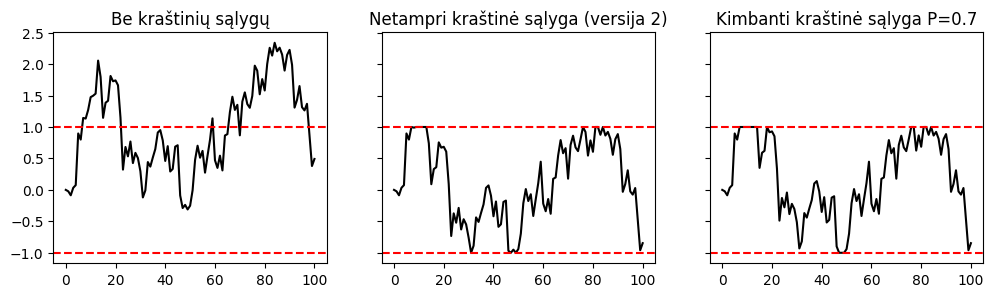

In [ ]:
f = FBM(n=100, hurst=0.5, length=10, method='daviesharte')
xx0 = f.fbm()

box_size = 1

fig, [ax0,ax1, ax2] = plt.subplots(1,3, figsize=(12,3), sharey = True, sharex=True)


ax0.plot(xx0, color='black')
ax0.set_title('Be kraštinių sąlygų')
ax0.axhline(y=box_size, linestyle='--',color='red')
ax0.axhline(y=-box_size, linestyle='--',color='red')


xx1 = judesys_dezeje_netamprus_begantis(xx0, box_size = box_size)
ax1.plot(xx1, color='black')
ax1.axhline(y=box_size, linestyle='--',color='red')
ax1.axhline(y=-box_size, linestyle='--',color='red')
ax1.set_title('Netampri kraštinė sąlyga (versija 2)')


xx2 = judesys_dezeje_kimbantis(xx0, box_size = box_size, P_kibimo =0.7)
ax2.plot(xx2, color='black')
ax2.axhline(y=box_size, linestyle='--',color='red')
ax2.axhline(y=-box_size, linestyle='--',color='red')
ax2.set_title('Kimbanti kraštinė sąlyga P=0.7')


# EXTRA SPICY FUN


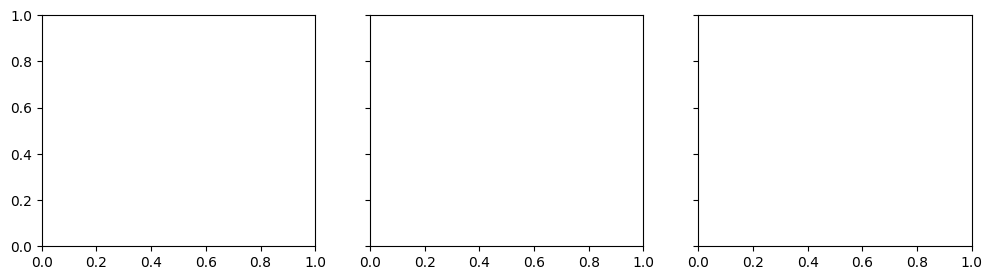

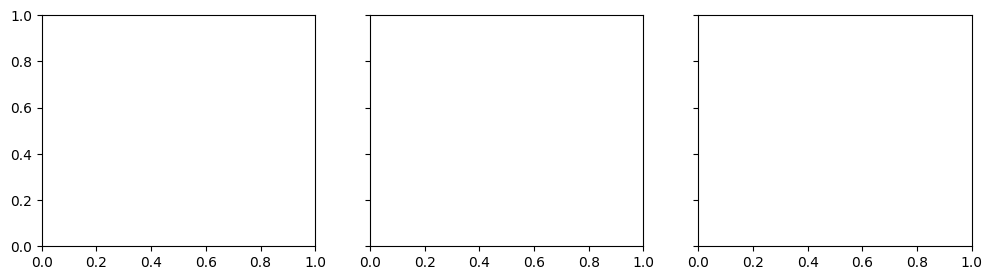

In [ ]:
#@title plot  fbm
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True, sharex=True)

fig2, [bx1,bx2,bx3] = plt.subplots(1,3, figsize=(12,3), sharey = True,sharex=True)



N = 1000


def FBM_hurst(ax, bx, beta=-1,  krastine_salyga = judesys_dezeje_netamprus,N = 1000, K =10,H_N = 100,title =None, **kwargs):
    hh_higuchi =[]
    hh_msd =[]
    hh_rs = []

    FAILED_higuchi = []
    FAILED_msd =[]
    FAILED_rs =[]


    hh  = np.linspace(0,1, H_N)[2:-2]

    for h in hh:
        #xx = levy_stable.rvs(alpha=a, beta=beta, size=N).cumsum()

        f = FBM(n=N, hurst=h, length=10, method='daviesharte')
        #paimam vidurki aritmetini kad grafikai nesokinetu tiek
        K_higuchi = K
        K_msd = K
        K_rs = K
        higuchi =0
        msd = 0
        rs = 0



        for _ in range(K):

            xx0 = f.fbm()[1:]
            if krastine_salyga!=None:
                xx = krastine_salyga(xx0,**kwargs)
            else:
                xx = xx0
            try:
                higuchi += 2-higuchi1(xx)
            except:
                K_higuchi -=1
                if K_higuchi <=0:
                    print("fuck higuchi")

            try:
                msd += myMSD(xx)
            except:
                K_msd -=1
                if K_msd <=0:
                    print("fuck msd")
            try:
                rs += myRS(xx)
            except:
                K_rs -=1
                if K_rs <=0:
                    print("fuck rs")

        FAILED_higuchi.append(10-K_higuchi)
        FAILED_msd.append(10-K_msd)
        FAILED_rs.append(10-K_rs)

        hh_higuchi.append( higuchi/K_higuchi )
        hh_msd.append(msd/K_msd)
        hh_rs.append(rs/K_rs)

    if title != None:
        ax.set_title(title)
    else:
        if krastine_salyga!=None:
            ax.set_title(f'FBM, dėžės dydis = {box_size}')
        else:
            ax.set_title(f'FBM be kraštinių sąlygų')


    R_higuchi = np.corrcoef(hh, hh_higuchi)[0,1];
    R_msd = np.corrcoef(hh, hh_msd)[0,1];
    R_rs = np.corrcoef(hh, hh_rs)[0,1];

    ax.plot(hh,hh_higuchi, label=r'Higuchi'+f' {R_higuchi:0.4f}', color='black', marker='o',linewidth = 1, markersize =2)
    ax.plot(hh,hh_msd, label = 'MSD'+f' {R_msd:0.4f}', color='blue', alpha = 0.7,marker='s',linewidth = 1, markersize =2)
    ax.plot(hh,hh_rs, label = 'R/S'+f' {R_rs:0.4f}', color='red', alpha = 0.7,marker='x',linewidth = 1, markersize =2)
    ax.set_xlabel(r'H (įvestis)')
    ax.set_ylabel(r'H (išvestis)')
    ax.plot(hh,hh, label='Teorinis', color='green', linewidth=0.6, linestyle ='--')

    ax.legend()

    try:
        bx.plot(hh, FAILED_higuchi, label=r'Higuchi', color='black', marker='o',linewidth = 1, markersize =2)
        bx.plot(hh, FAILED_msd, label = 'MSD', color='blue', alpha = 0.7,marker='s',linewidth = 1, markersize =3)
        bx.plot(hh, FAILED_rs, label = 'R/S', color='red', alpha = 0.7,marker='x',linewidth = 1, markersize =2)
        bx.set_xlabel(r'H (įvestis)')
        bx.set_ylabel(r'Algoritmas lūžo')
        bx.legend()
    except:
        print('fuckity')

#FBM_hurst(ax1,bx1, krastine_salyga=None)
#for ax,bx, box_size in wait(zip([ax2,ax3],[bx2,bx3], [1,0.01])):
#    FBM_hurst(ax,bx, krastine_salyga=judesys_dezeje_netamprus, box_size =box_size)
#ax1.legend(loc='lower right')
#fig.suptitle('Netamprios kraštinės sąlygos',y=1.1)


3it [05:43, 114.63s/it]


Text(0.5, 1.1, 'Netamprios kraštinės sąlygos')

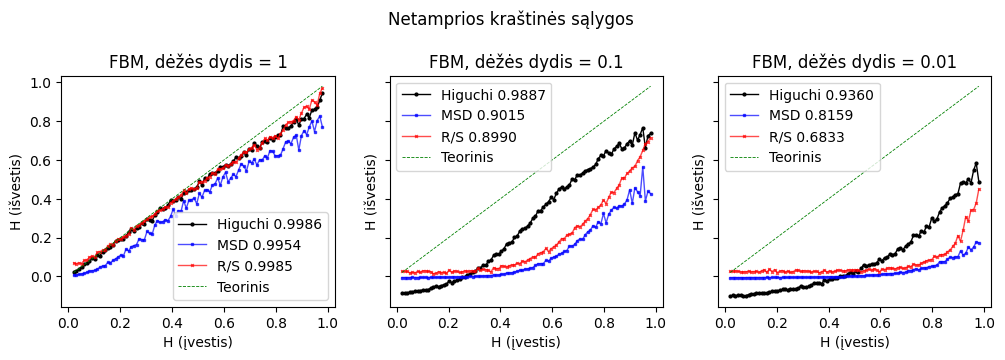

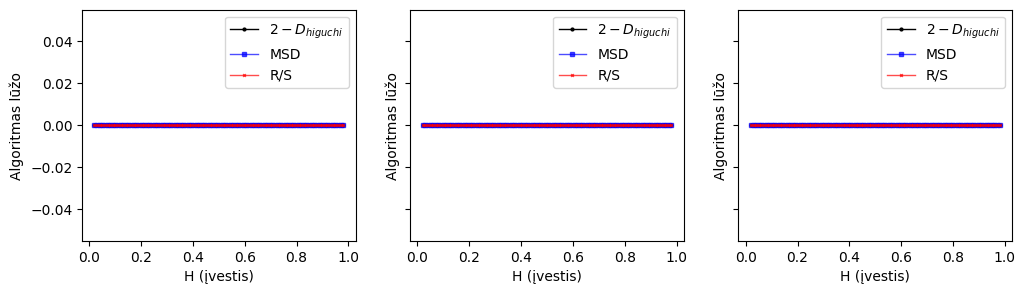

In [ ]:
#@title plot netamprus begantis dėžės for fbm

fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True, sharex=True)
fig2, [bx1,bx2,bx3] = plt.subplots(1,3, figsize=(12,3), sharey = True,sharex=True)


for ax,bx, box_size in wait(zip([ax1,ax2,ax3],[bx1, bx2,bx3], [1,0.1,0.01])):
    FBM_hurst(ax,bx, krastine_salyga=judesys_dezeje_netamprus_begantis, box_size =box_size, N =1000, K = 10, H_N = 100)
fig.suptitle('Netamprios kraštinės sąlygos',y=1.1)

3it [05:47, 115.81s/it]


Text(0.5, 1.1, 'Netamprios kraštinės sąlygos')

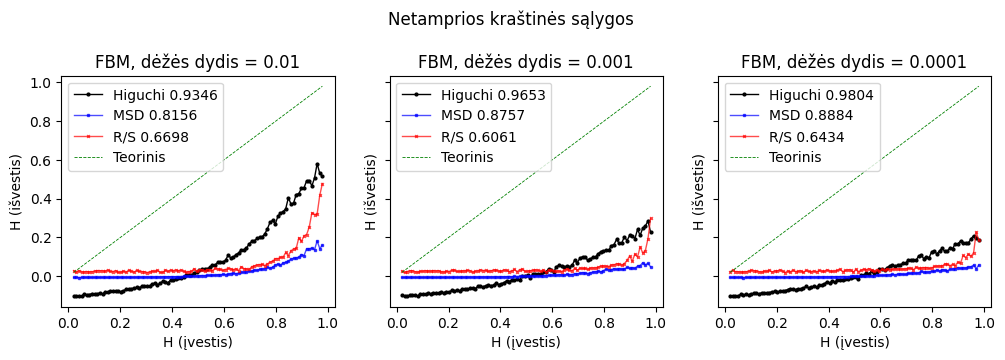

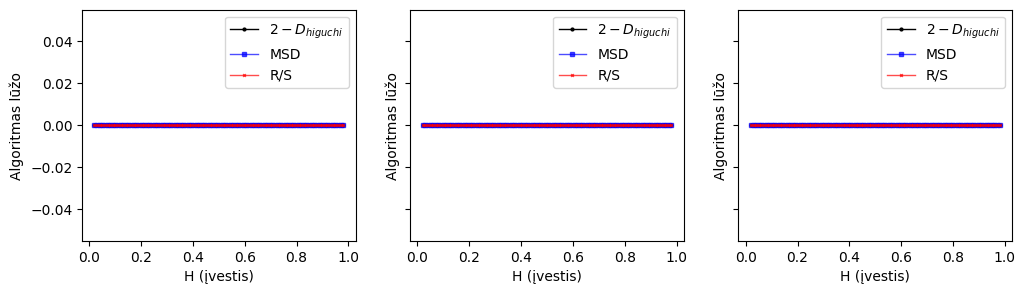

In [ ]:
#@title plot netamprus begantis dėžės for fbm

fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True, sharex=True)
fig2, [bx1,bx2,bx3] = plt.subplots(1,3, figsize=(12,3), sharey = True,sharex=True)


for ax,bx, box_size in wait(zip([ax1,ax2,ax3],[bx1, bx2,bx3], [0.01,0.001,0.0001])):
    FBM_hurst(ax,bx, krastine_salyga=judesys_dezeje_netamprus_begantis, box_size =box_size, N =1000, K = 10, H_N = 100)
fig.suptitle('Netamprios kraštinės sąlygos',y=1.1)

3it [06:40, 133.42s/it]


Text(0.5, 1.1, 'Netamprios kraštinės sąlygos')

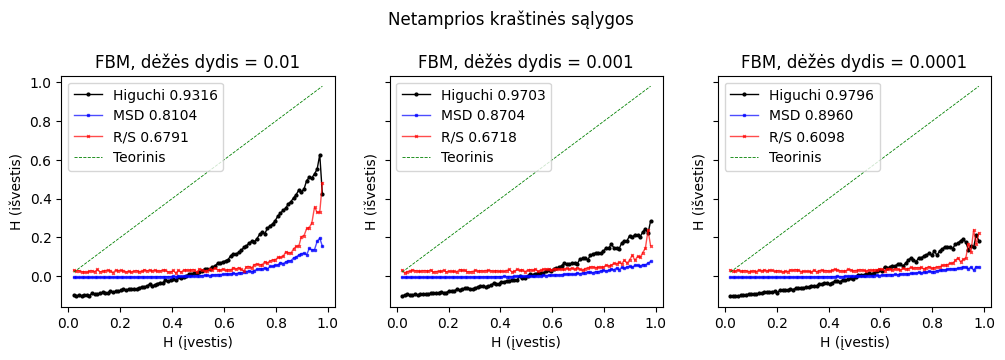

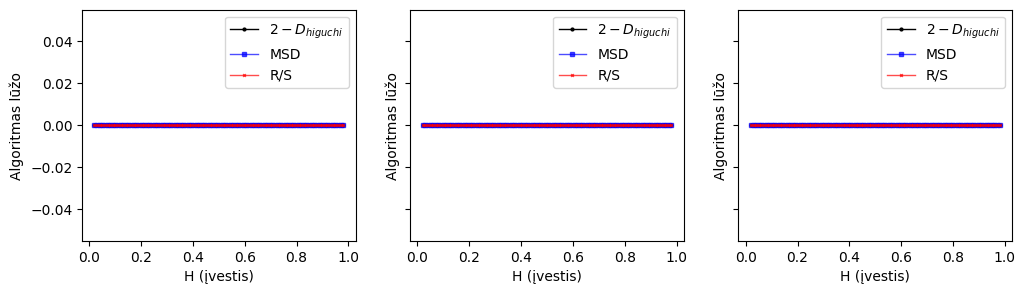

In [ ]:
#@title plot netampri dėžės for fbm
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True, sharex=True)
fig2, [bx1,bx2,bx3] = plt.subplots(1,3, figsize=(12,3), sharey = True,sharex=True)


for ax,bx, box_size in wait(zip([ax1,ax2,ax3],[bx1, bx2,bx3], [0.01,0.001,0.0001])):
    FBM_hurst(ax,bx, krastine_salyga=judesys_dezeje_netamprus_begantis, box_size =box_size, N =1000, K = 10, H_N = 100)
fig.suptitle('Netamprios kraštinės sąlygos',y=1.1)

0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
3it [06:01, 120.60s/it]


Text(0.5, 1.1, 'Kimbančios kraštinės sąlygos')

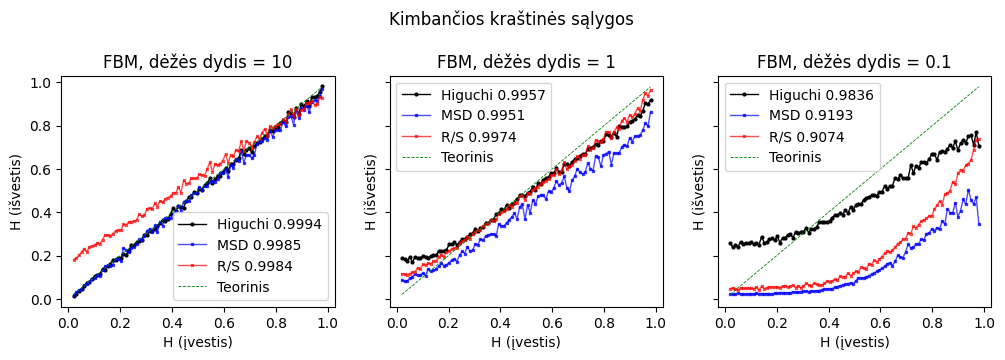

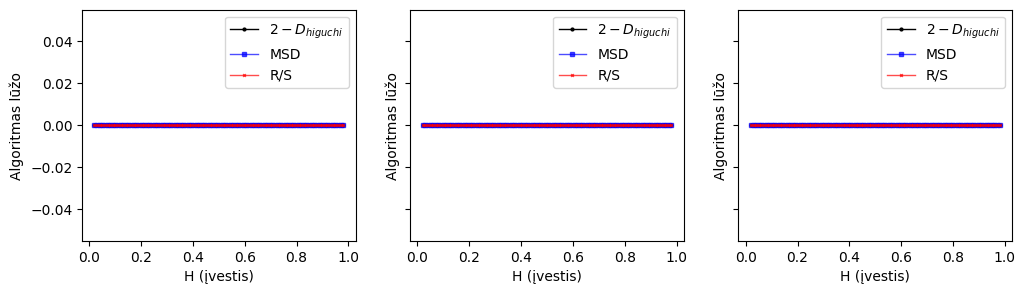

In [ ]:
#@title plot kimbanti dėžės for fbm

fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True, sharex=True)
fig2, [bx1,bx2,bx3] = plt.subplots(1,3, figsize=(12,3), sharey = True,sharex=True)


for ax,bx, box_size in wait(zip([ax1,ax2,ax3],[bx1, bx2,bx3], [10,1,0.1])):
    FBM_hurst(ax,bx, krastine_salyga=judesys_dezeje_kimbantis, box_size =box_size, P_kibimo=0.5, N =1000, K = 10, H_N = 100)
fig.suptitle('Kimbančios kraštinės sąlygos',y=1.1)

0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
3it [06:17, 125.90s/it]


Text(0.5, 1.1, 'Kimbančios kraštinės sąlygos, FBM, dėžės dydis 0.1, kinta kibimo stipris P')

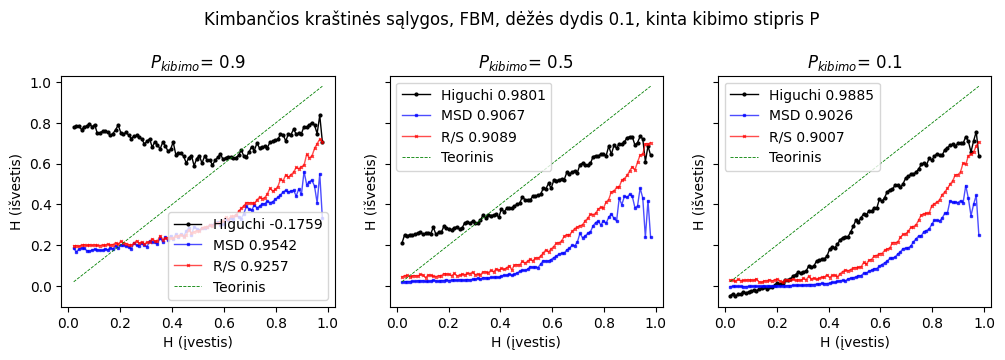

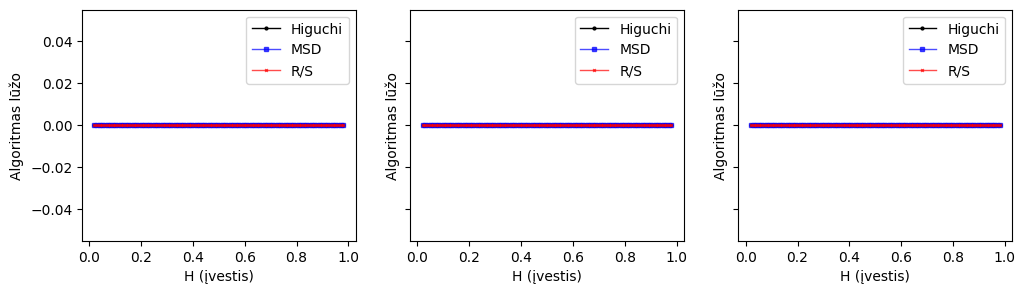

In [ ]:
#@title plot kimbanti dėžės for fbm

fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True, sharex=True)
fig2, [bx1,bx2,bx3] = plt.subplots(1,3, figsize=(12,3), sharey = True,sharex=True)


for ax,bx, P_kibimo in wait(zip([ax1,ax2,ax3],[bx1, bx2,bx3], [0.9,0.5,0.1])):
    FBM_hurst(ax,bx, krastine_salyga=judesys_dezeje_kimbantis, box_size =0.1,title=r'$P_{kibimo}$= '+f'{P_kibimo}', N =1000, K = 10, H_N = 100, P_kibimo = P_kibimo)
fig.suptitle('Kimbančios kraštinės sąlygos, FBM, dėžės dydis 0.1, kinta kibimo stipris P',y=1.1)

0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
3it [05:42, 114.10s/it]
3it [05:40, 113.44s/it]
3it [05:43, 114.48s/it]


Text(0.5, 1.1, 'Kimbančios kraštinės sąlygos, FBM, kinta kibimo stipris P ir dėžės dydis')

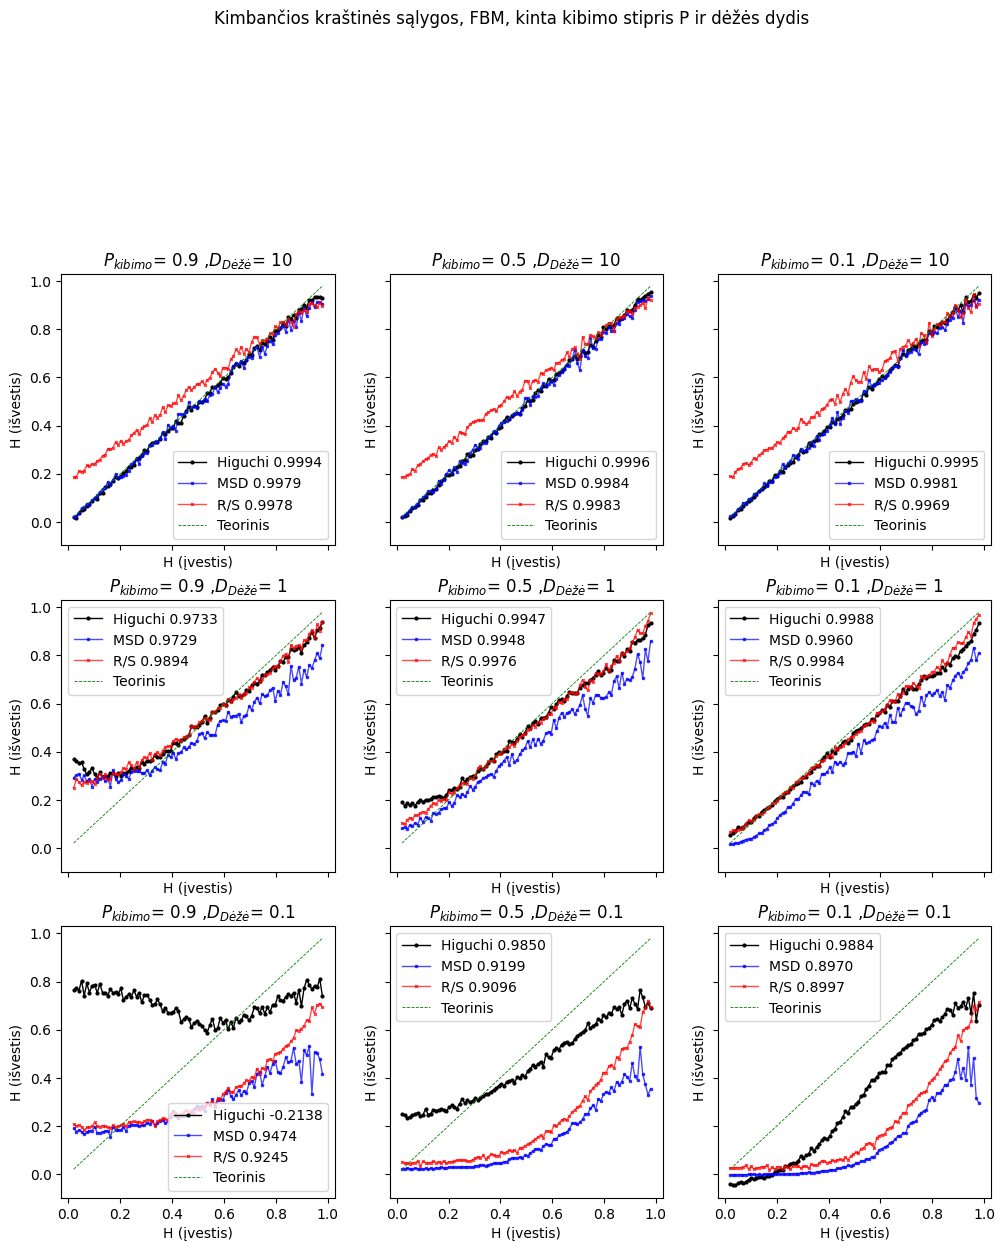

In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(3,3, figsize=(12,12), sharey = True, sharex=True)


for ax, box_size in zip([ax1,ax2,ax3],[5,0.5,0.05]):

    for P_kibimo,i in wait(zip([0.9,0.5,0.1], [0,1,2])):

        FBM_hurst(ax[i],bx, krastine_salyga=judesys_dezeje_kimbantis, box_size =box_size,title=r'$P_{kibimo}$= '+f'{P_kibimo}, ' +r'$D_{Dėžė}$= '+f'{box_size}', N =1000, K = 10, H_N = 100, P_kibimo = P_kibimo)

fig.suptitle('Kimbančios kraštinės sąlygos, FBM, kinta kibimo stipris P ir dėžės dydis')

0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
3it [06:07, 122.43s/it]
3it [05:48, 116.26s/it]
3it [05:50, 116.69s/it]


Text(0.5, 0.98, 'Kimbančios kraštinės sąlygos, FBM, kinta kibimo stipris P ir dėžės dydis')

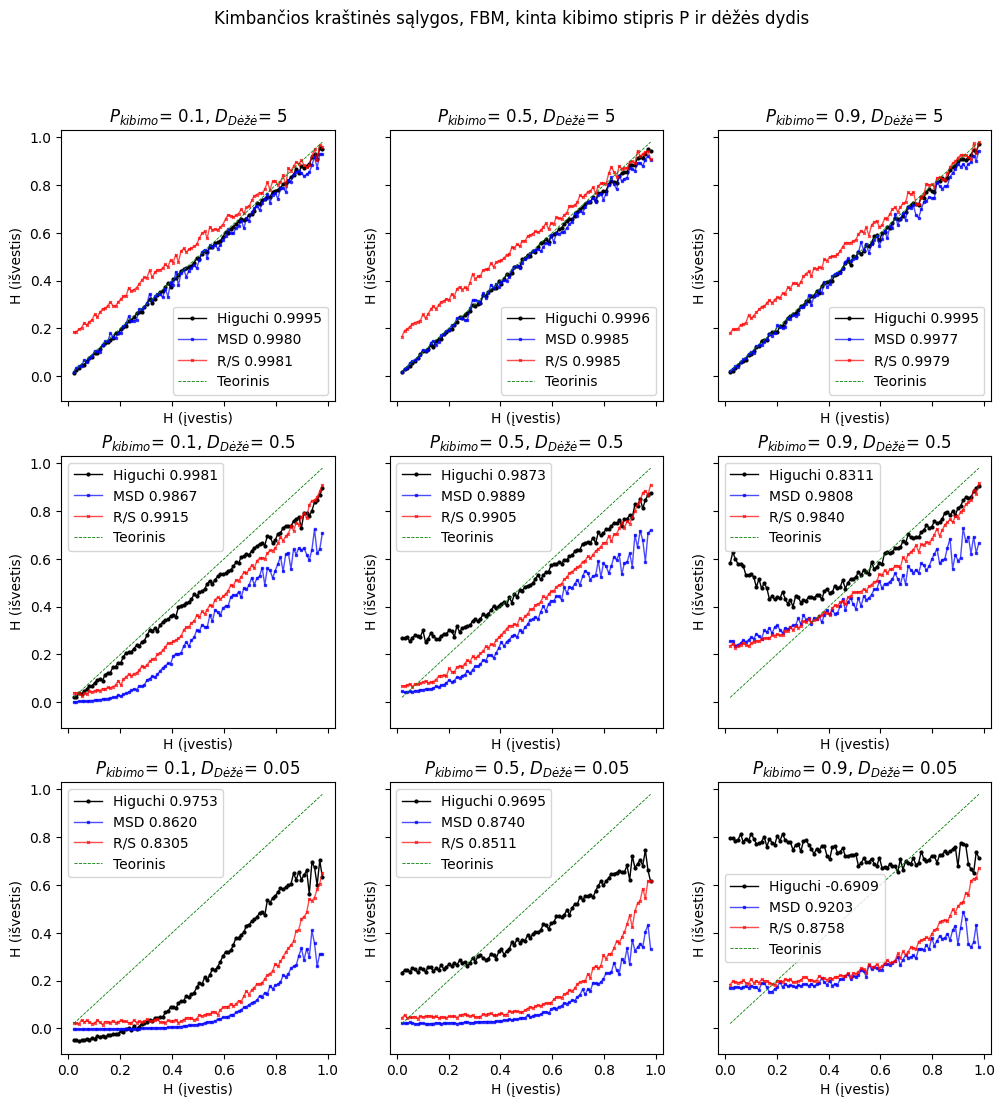

In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(3,3, figsize=(12,12), sharey = True, sharex=True)


for ax, box_size in zip([ax1,ax2,ax3],[5,0.5,0.05]):

    for P_kibimo,i in wait(zip([0.1,0.5,0.9], [0,1,2])):

        FBM_hurst(ax[i],bx, krastine_salyga=judesys_dezeje_kimbantis, box_size =box_size,title=r'$P_{kibimo}$= '+f'{P_kibimo}, ' +r'$D_{Dėžė}$= '+f'{box_size}', N =1000, K = 10, H_N = 100, P_kibimo = P_kibimo)

fig.suptitle('Kimbančios kraštinės sąlygos, FBM, kinta kibimo stipris P ir dėžės dydis')

/usr/local/lib/python3.10/dist-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
1it [01:56, 116.97s/it]<ipython-input-10-7f034873b057>:17: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(Lk/(m+1)))
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
2it [03:52, 116.44s/it]


Text(0.5, 1.1, 'Nukirptos kraštinės sąlygos')

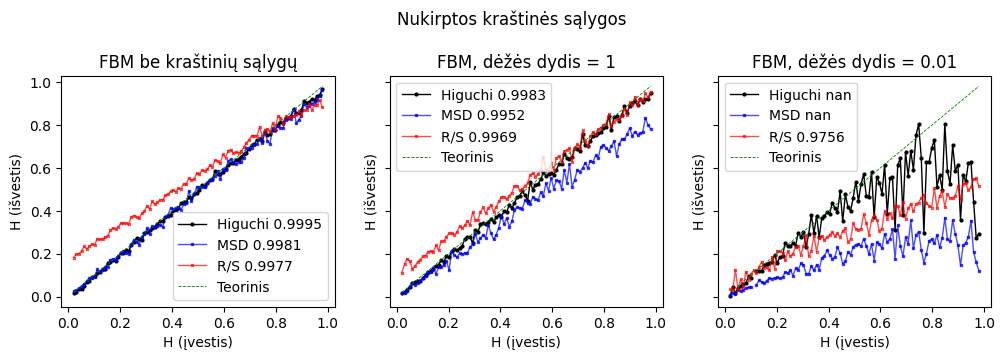

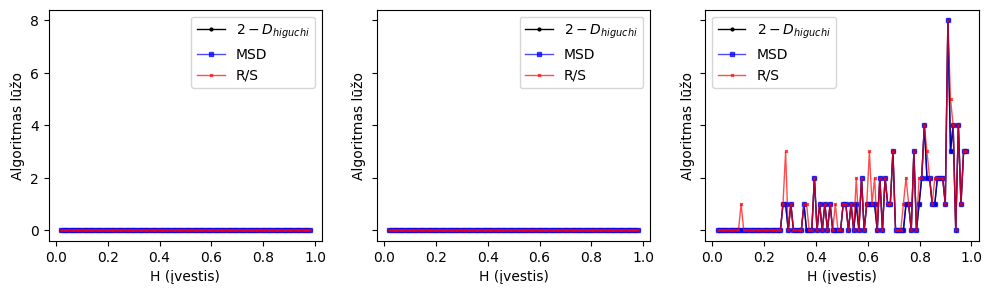

In [ ]:
#@title plot nukirptos dėžės for fbm
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True, sharex=True)
fig2, [bx1,bx2,bx3] = plt.subplots(1,3, figsize=(12,3), sharey = True,sharex=True)


FBM_hurst(ax1,bx1, krastine_salyga=None)
for ax,bx, box_size in wait(zip([ax2,ax3],[bx2,bx3], [1,0.01])):
    FBM_hurst(ax,bx, krastine_salyga=judesys_dezeje_netamprus, box_size =box_size)
#ax1.legend(loc='lower right')
fig.suptitle('Nukirptos kraštinės sąlygos',y=1.1)


/usr/local/lib/python3.10/dist-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
2it [04:26, 133.39s/it]


Text(0.5, 1.06, 'Tamprios kraštinės sąlygos')

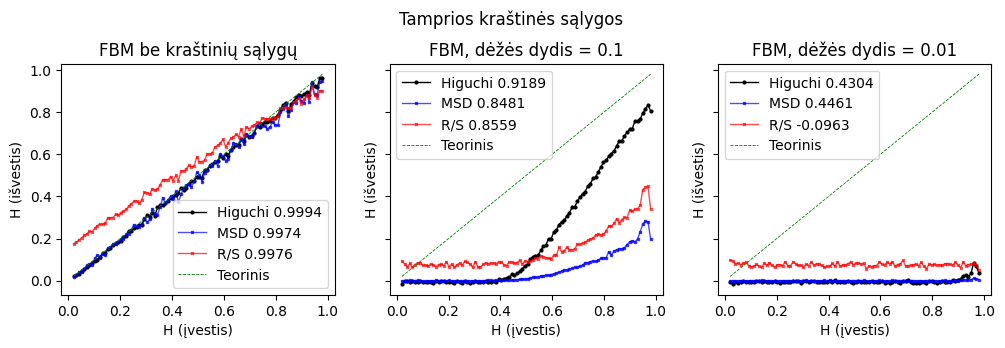

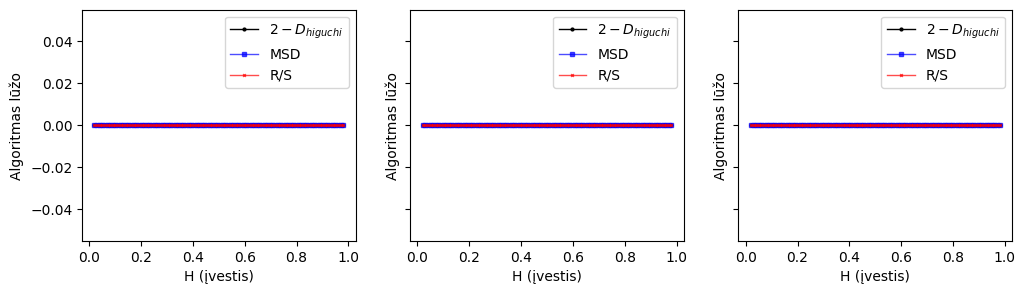

In [ ]:
#@title plot tamprus dėžės for fbm
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True, sharex=True)

fig2, [bx1,bx2,bx3] = plt.subplots(1,3, figsize=(12,3), sharey = True,sharex=True)

FBM_hurst(ax1,bx1, krastine_salyga=None)
for ax,bx, box_size in wait(zip([ax2,ax3],[bx2,bx3], [0.1,0.01])):
    FBM_hurst(ax,bx, krastine_salyga=judesys_dezeje_tamprus, box_size =box_size)
#ax1.legend(loc='lower right')
fig.suptitle('Tamprios kraštinės sąlygos',y=1.06)

In [ ]:
#@title plot for levy
from scipy.stats import levy_stable



def levy_hurst(ax, bx, beta=-1, krastine_salyga = judesys_dezeje_netamprus,title= None,N =1000,K=10,H_N =100, **kwargs):
    hh_higuchi =[]
    hh_msd =[]
    hh_rs = []

    FAILED_higuchi = []
    FAILED_msd =[]
    FAILED_rs =[]


    hh  = np.linspace(0.51,1, H_N)[2:-2]

    for h in hh:

        #f = FBM(n=N, hurst=h, length=10, method='daviesharte')
        #paimam vidurki aritmetini kad grafikai nesokinetu tiek
        K = K
        K_higuchi = K
        K_msd = K
        K_rs = K
        higuchi =0
        msd = 0
        rs = 0



        for _ in range(K):

            try:
                xx0 = levy_stable.rvs(alpha=1/h, beta=0, size=N).cumsum()/1000
                if krastine_salyga != None:
                    try:
                        xx = krastine_salyga(xx0,**kwargs)
                    except:
                        print('kraštinė sąlyga dont work')
                else:
                    xx = xx0
            except:
                print('notgenerating')
                return



            try:
                higuchi += 2-higuchi1(xx)
            except:
                K_higuchi -=1
                if K_higuchi <=0:
                    print("fuck higuchi")

            try:
                msd += myMSD(xx)
            except:
                K_msd -=1
                if K_msd <=0:
                    print("fuck msd")
            try:
                rs += myRS(xx)
            except:
                K_rs -=1
                if K_rs <=0:
                    print("fuck rs")

        FAILED_higuchi.append(K-K_higuchi)
        FAILED_msd.append(K-K_msd)
        FAILED_rs.append(K-K_rs)

        hh_higuchi.append( higuchi/K_higuchi )
        hh_msd.append(msd/K_msd)
        hh_rs.append(rs/K_rs)

    if title != None:
        ax.set_title(title)
    else:
        if krastine_salyga!=None:
            ax.set_title(f'Dėžės dydis = {box_size}')
        else:
            ax.set_title(f'Be kraštinių sąlygų')



    R_higuchi = np.corrcoef(hh, hh_higuchi)[0,1];
    R_msd = np.corrcoef(hh, hh_msd)[0,1];
    R_rs = np.corrcoef(hh, hh_rs)[0,1];

    ax.plot(hh,hh_higuchi, label=r'Higuchi'+f' {R_higuchi:0.4f}', color='black', marker='o',linewidth = 1, markersize =2)
    ax.plot(hh,hh_msd, label = 'MSD'+f' {R_msd:0.4f}', color='blue', alpha = 0.7,marker='s',linewidth = 1, markersize =2)
    ax.plot(hh,hh_rs, label = 'R/S'+f' {R_rs:0.4f}', color='red', alpha = 0.7,marker='x',linewidth = 1, markersize =2)
    ax.plot(hh,hh, label='Teorinis', color='green', linewidth=0.6, linestyle ='--')

    ax.set_xlabel(r'H (įvestis)')
    ax.set_ylabel(r'H (išvestis)')

    ax.set_xlabel(r'H (įvestis)')
    ax.set_ylabel(r'H (išvestis)')
    ax.legend()

    try:
        bx.plot(hh, FAILED_higuchi, label=r'$2-D_{higuchi}$', color='black', marker='o',linewidth = 1, markersize =2)
        bx.plot(hh, FAILED_msd, label = 'MSD', color='blue', alpha = 0.7,marker='s',linewidth = 1, markersize =3)
        bx.plot(hh, FAILED_rs, label = 'R/S', color='red', alpha = 0.7,marker='x',linewidth = 1, markersize =2)
        bx.set_xlabel(r'H (įvestis)')
        bx.set_ylabel(r'Algoritmas lūžo')
        bx.legend()
    except:
        print('fuckity')

#fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True, sharex=True)

#fig2, [bx1,bx2,bx3] = plt.subplots(1,3, figsize=(12,3), sharey = True,sharex=True)

#fig.suptitle('Netamprios kraštinės sąlygos', y =1.07)

#levy_hurst(ax1,bx1, krastine_salyga=None)
#for ax,bx, box_size in wait(zip([ax2,ax3],[bx2,bx3], [1,0.01])):
#    levy_hurst(ax,bx, krastine_salyga=judesys_dezeje_netamprus, box_size =box_size)
#ax1.legend(loc='lower left')


3it [00:50, 16.82s/it]


Text(0.5, 1.1, 'Netamprios kraštinės sąlygos, Levy $\\alpha$-stabilus.')

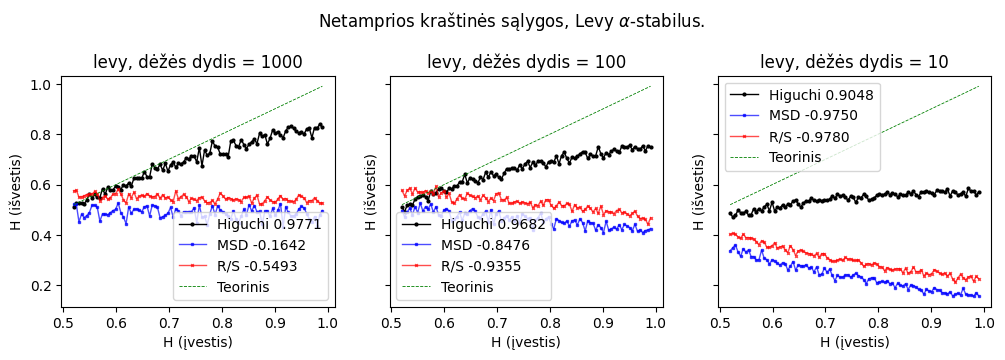

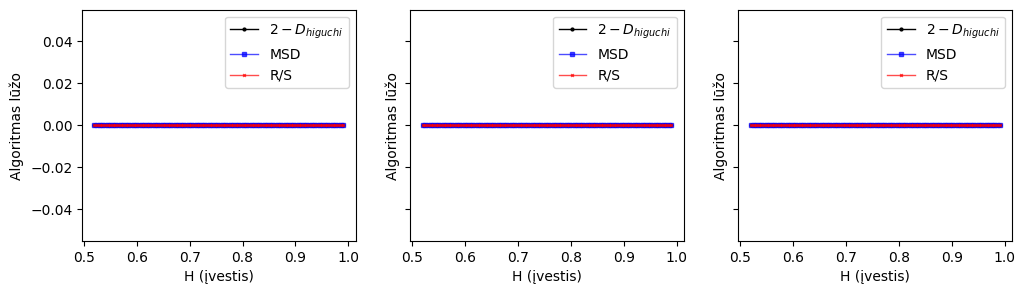

In [ ]:
#@title plot netamprus begantis dėžės for levy

fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True, sharex=True)
fig2, [bx1,bx2,bx3] = plt.subplots(1,3, figsize=(12,3), sharey = True,sharex=True)


for ax,bx, box_size in wait(zip([ax1,ax2,ax3],[bx1, bx2,bx3], [1000,100,10])):
    levy_hurst(ax,bx, krastine_salyga=judesys_dezeje_netamprus_begantis, box_size =box_size, N =1000, K = 10, H_N = 100)
ax1.legend(loc='lower right')
fig.suptitle(r'Netamprios kraštinės sąlygos, Levy $\alpha$-stabilus',y=1.1)

3it [00:50, 16.92s/it]


Text(0.5, 1.1, 'Netamprios kraštinės sąlygos,  Levy $\\alpha$-stabilus')

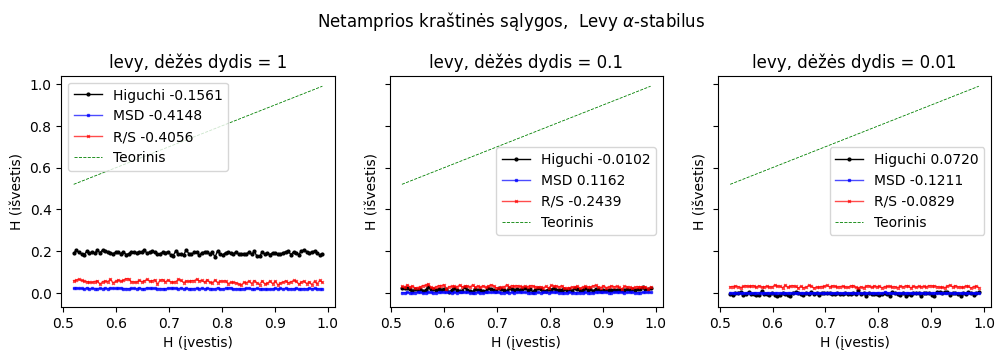

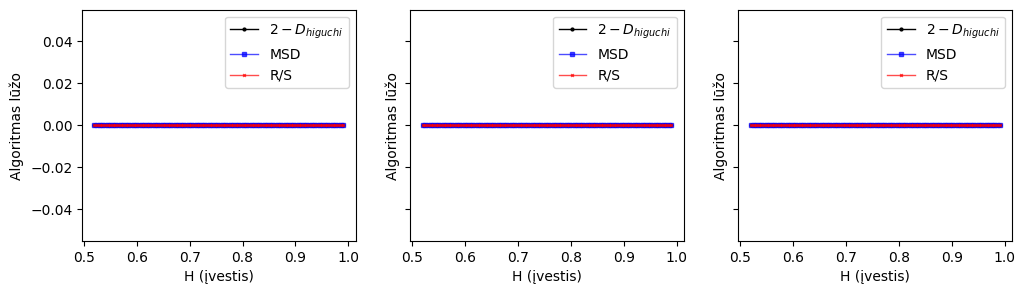

In [ ]:
#@title plot netamprus begantis dėžės for levy

fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True, sharex=True)
fig2, [bx1,bx2,bx3] = plt.subplots(1,3, figsize=(12,3), sharey = True,sharex=True)


for ax,bx, box_size in wait(zip([ax1,ax2,ax3],[bx1, bx2,bx3], [1,0.1,0.01])):
    levy_hurst(ax,bx, krastine_salyga=judesys_dezeje_netamprus_begantis, box_size =box_size, N =1000, K = 10, H_N = 100)
ax1.legend(loc='upper left')
fig.suptitle(r'Netamprios kraštinės sąlygos,  Levy $\alpha$-stabilus',y=1.1)

2it [05:44, 172.34s/it]


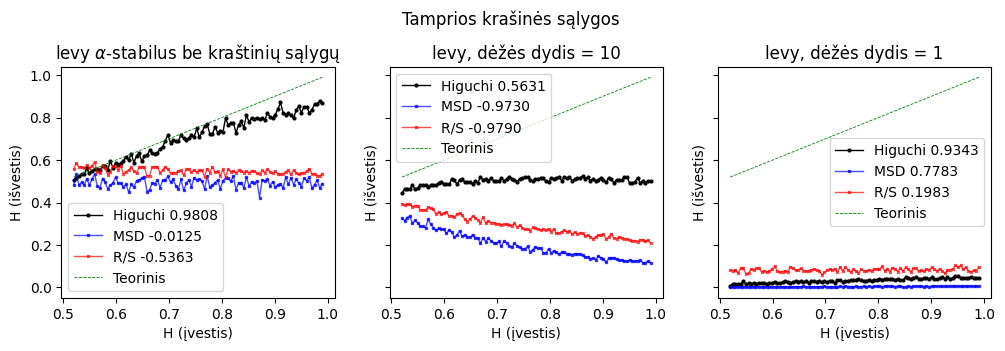

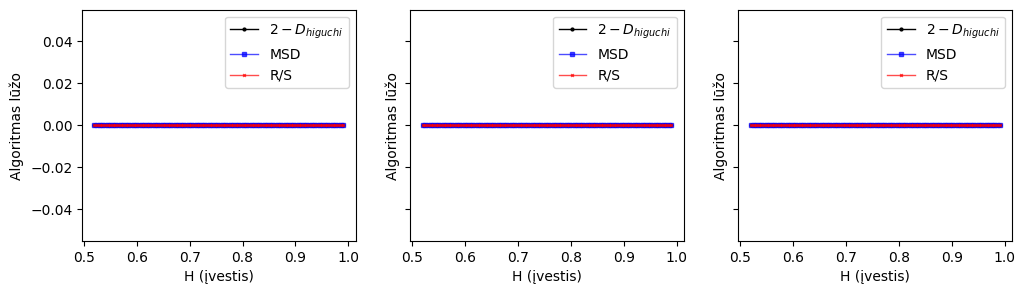

In [ ]:
#@title plot tampri dėžės for levy
fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True, sharex=True)

fig2, [bx1,bx2,bx3] = plt.subplots(1,3, figsize=(12,3), sharey = True,sharex=True)
fig.suptitle('Tamprios kraštinės sąlygos', y =1.07)

levy_hurst(ax1,bx1, krastine_salyga=None)
for ax,bx, box_size in wait(zip([ax2,ax3],[bx2,bx3], [10,1])):
    levy_hurst(ax,bx, krastine_salyga=judesys_dezeje_tamprus,N =1000, box_size =box_size)
ax1.legend(loc='lower left')

3it [01:07, 22.47s/it]


Text(0.5, 1.1, 'Kimbančios kraštinės sąlygos')

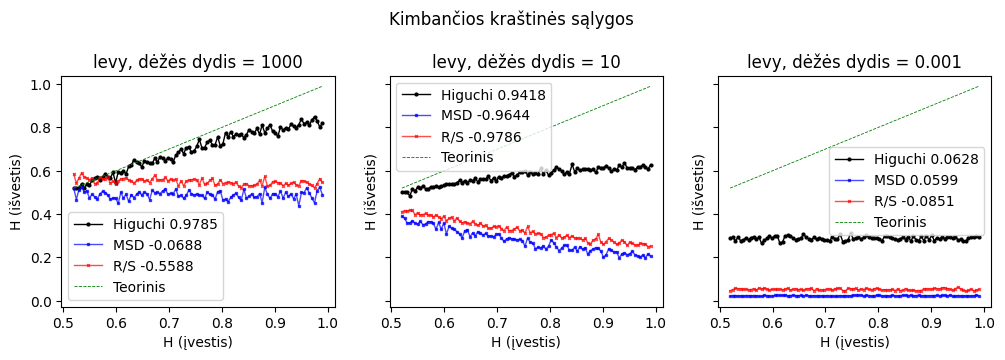

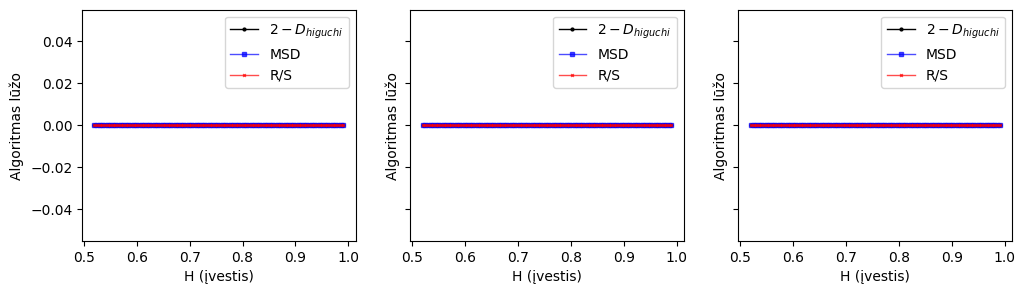

In [ ]:
#@title plot kimbanti dėžės for levy

fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True, sharex=True)
fig2, [bx1,bx2,bx3] = plt.subplots(1,3, figsize=(12,3), sharey = True,sharex=True)


for ax,bx, box_size in wait(zip([ax1,ax2,ax3],[bx1, bx2,bx3], [1000,10,0.001])):
    levy_hurst(ax,bx, krastine_salyga=judesys_dezeje_kimbantis, box_size =box_size, P_kibimo=0.5, N =1000, K = 10, H_N = 100)
fig.suptitle('Kimbančios kraštinės sąlygos',y=1.1)

3it [00:57, 19.30s/it]
3it [00:51, 17.20s/it]
3it [00:52, 17.45s/it]


Text(0.5, 0.98, 'Kimbančios kraštinės sąlygos, FBM, kinta kibimo stipris P ir dėžės dydis')

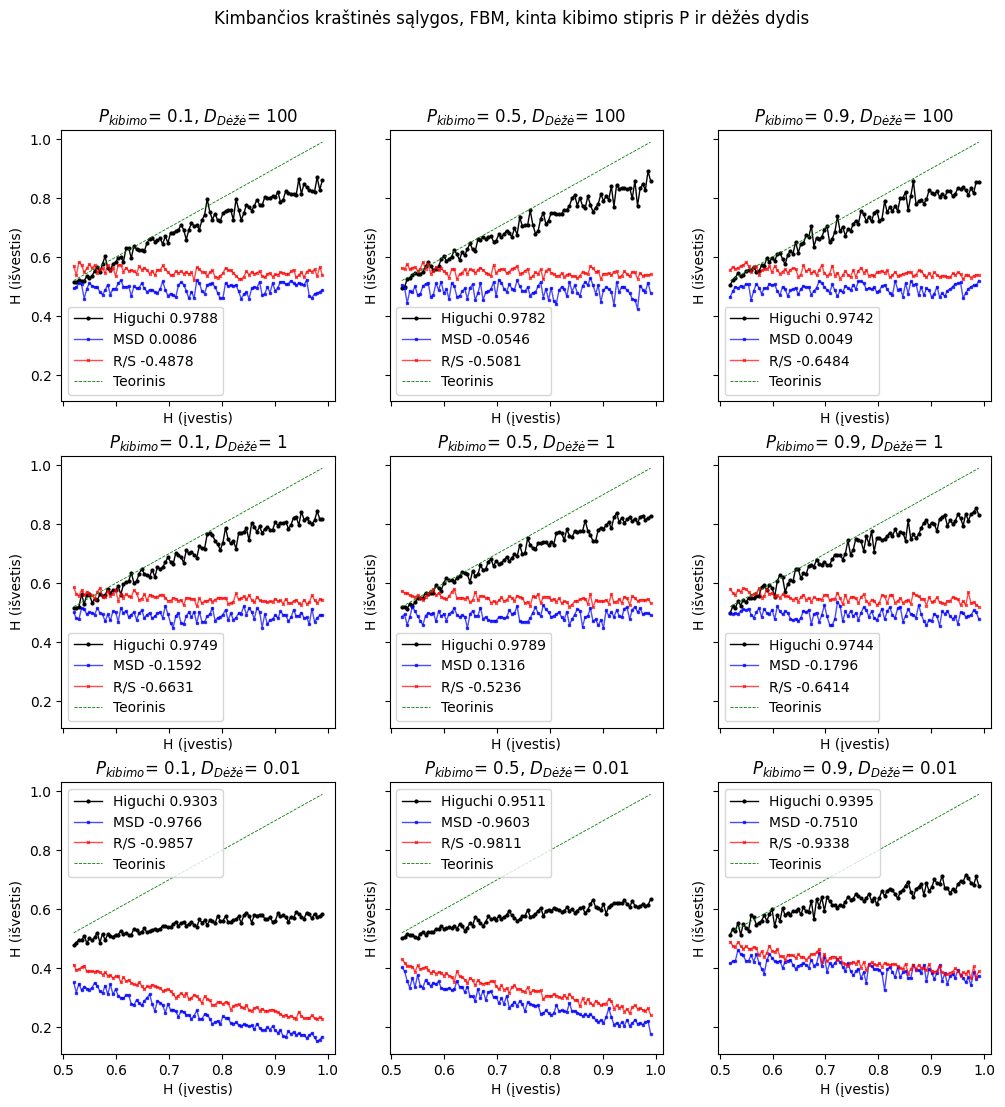

In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(3,3, figsize=(12,12), sharey = True, sharex=True)

0
for ax, box_size in zip([ax1,ax2,ax3],[100,1,0.01]):

    for P_kibimo,i in wait(zip([0.1,0.5,0.9], [0,1,2])):
        try:
            levy_hurst(ax[i],bx, krastine_salyga=judesys_dezeje_kimbantis, box_size =box_size,title=r'$P_{kibimo}$= '+f'{P_kibimo}, ' +r'$D_{Dėžė}$= '+f'{box_size}', N =1000, K = 10, H_N = 100, P_kibimo = P_kibimo)
        except:
            pass
fig.suptitle('Kimbančios kraštinės sąlygos, Levy, kinta kibimo stipris P ir dėžės dydis')

0it [00:00, ?it/s]

kraštinė sąlyga is bad
kraštinė sąlyga is bad
kraštinė sąlyga is bad
kraštinė sąlyga is bad
kraštinė sąlyga is bad
kraštinė sąlyga is bad
kraštinė sąlyga is bad
kraštinė sąlyga is bad
kraštinė sąlyga is bad
kraštinė sąlyga is bad
fuck higuchi
fuck msd
fuck rs


ZeroDivisionError: division by zero

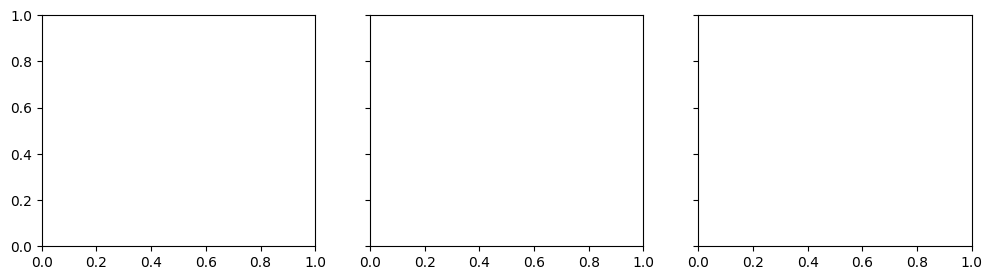

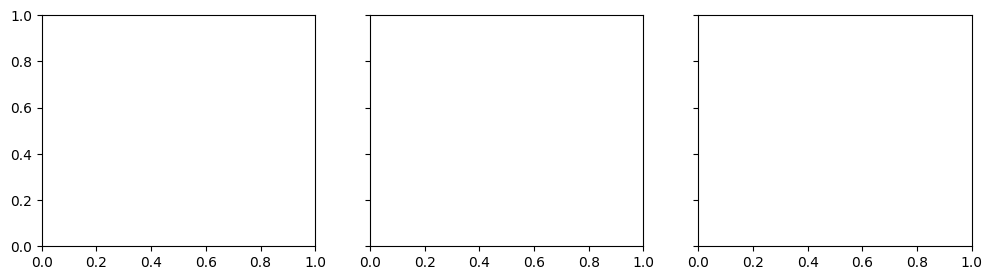

In [ ]:
#@title plot kimbanti dėžės for fbm

fig, [ax1,ax2,ax3] = plt.subplots(1,3, figsize=(12,3), sharey = True, sharex=True)
fig2, [bx1,bx2,bx3] = plt.subplots(1,3, figsize=(12,3), sharey = True,sharex=True)


for ax,bx, P_kibimo in wait(zip([ax1,ax2,ax3],[bx1, bx2,bx3],[0.1,0.5,0.9])):
    levy_hurst(ax,bx, krastine_salyga=judesys_dezeje_kimbantis, box_size =0.1,title=r'$P_{kibimo}$= '+f'{P_kibimo}', N =1000, K = 10, H_N = 100, P_kibimo = P_kibimo)
fig.suptitle('Kimbančios kraštinės sąlygos, Levy, dėžės dydis 0.1, kinta kibimo stipris P',y=1.1)

# Levy fbm vizualizacijos


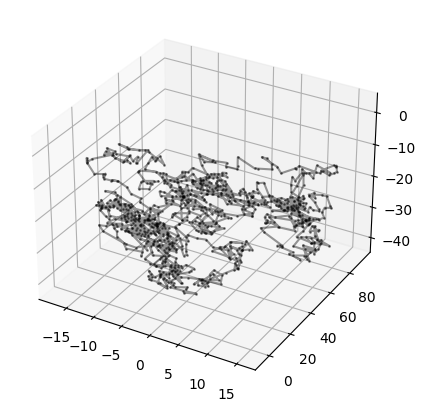

In [ ]:
h = 0.5
N = 1000

xx0 = levy_stable.rvs(alpha=1/h, beta=0, size=N).cumsum()
xx1 = levy_stable.rvs(alpha=1/h, beta=0, size=N).cumsum()
xx2 = levy_stable.rvs(alpha=1/h, beta=0, size=N).cumsum()

ax = plt.figure().add_subplot(projection='3d')
ax.plot(xx0,xx1,xx2, alpha = 0.4, color='black',marker='o', markersize=1)

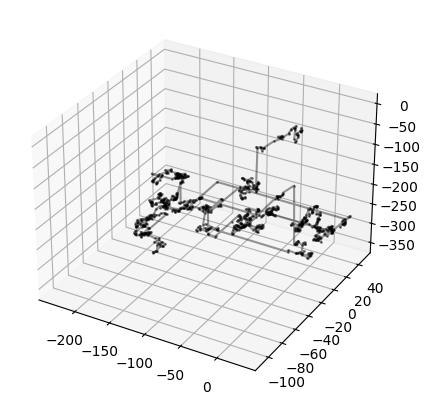

In [ ]:
h = 0.7
N = 1000

xx0 = levy_stable.rvs(alpha=1/h, beta=0, size=N).cumsum()
xx1 = levy_stable.rvs(alpha=1/h, beta=0, size=N).cumsum()
xx2 = levy_stable.rvs(alpha=1/h, beta=0, size=N).cumsum()

ax = plt.figure().add_subplot(projection='3d')
ax.plot(xx0,xx1,xx2, alpha = 0.4, color='black',marker='o', markersize=1)

(array([1042.,  849.,  929.,   95.,    0.,  128., 2465., 2111., 1498.,
         883.]),
 array([-988.33349097, -870.40521127, -752.47693157, -634.54865188,
        -516.62037218, -398.69209249, -280.76381279, -162.83553309,
         -44.9072534 ,   73.0210263 ,  190.94930599]),
 <BarContainer object of 10 artists>)

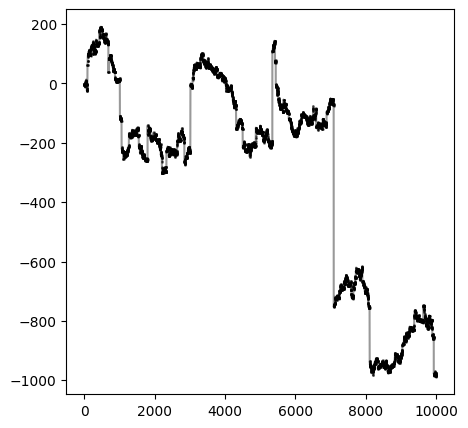

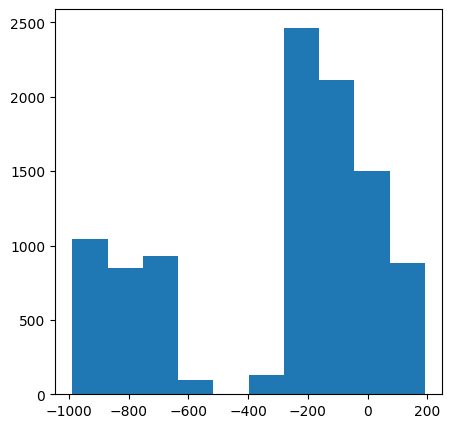

In [ ]:
h = 0.7
N = 10000

xx0 = levy_stable.rvs(alpha=1/h, beta=0, size=N).cumsum()

#ax = plt.figure().add_subplot(projection='3d')
plt.plot(xx0, alpha = 0.4, color='black',marker='o', markersize=1)
plt.figure()
plt.hist(xx0)

(array([ 417.,  816., 1000., 1374., 1600., 2031., 1355.,  155.,  616.,
         636.]),
 array([-4.55737730e+01, -3.98770864e+01, -3.41803998e+01, -2.84837132e+01,
        -2.27870266e+01, -1.70903400e+01, -1.13936534e+01, -5.69696685e+00,
        -2.80250089e-04,  5.69640635e+00,  1.13930929e+01]),
 <BarContainer object of 10 artists>)

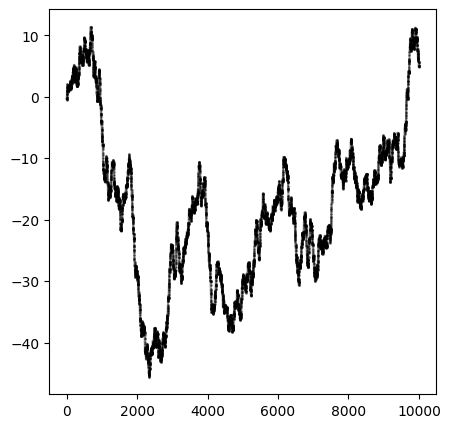

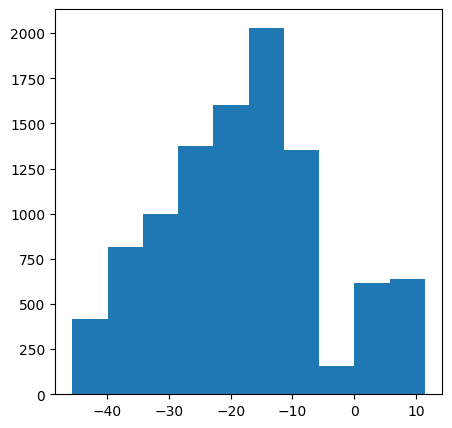

In [ ]:
h = 0.7
N = 10000

#xx0 = levy_stable.rvs(alpha=1/h, beta=0, size=N).cumsum()

f = FBM(n=N, hurst=h, length=1000, method='daviesharte')

xx0 = f.fbm()[1:]

#ax = plt.figure().add_subplot(projection='3d')
plt.plot(xx0, alpha = 0.4, color='black',marker='o', markersize=1)
plt.figure()
plt.hist(xx0)

(-49.95, 1048.95, -2765.9024165413553, 1613.1404475875765)

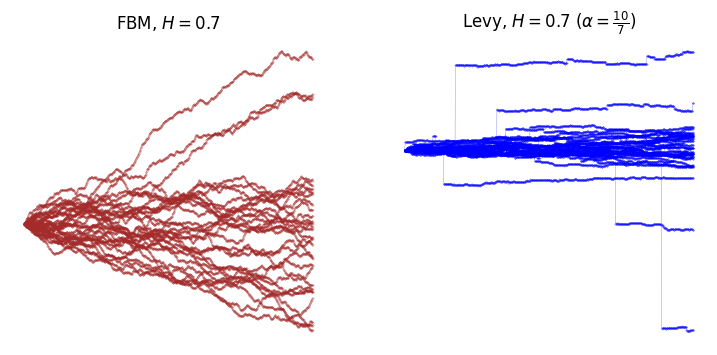

In [ ]:
fig, [ax1,ax2] = plt.subplots(1,2, figsize=(9,4))#, sharey = True, sharex=True)

#fig2, [bx1,bx2,bx3] = plt.subplots(1,3, figsize=(12,3), sharey = True,sharex=True)


h = 0.7
N = 1000
K = 30


f = FBM(n=N, hurst=h, length=100, method='daviesharte')
for _ in range(K):
    xx1 = f.fbm()[1:]
    ax1.plot(xx1, alpha = 0.5, color='brown',marker='o', markersize=0.3, linewidth=0.3)


ax1.set_title('FBM, $H =0.7$')
ax1.set_ylabel(r'$X_t$')
ax1.set_xlabel('$t$')
ax1.axis('off')

for _ in range(K):
    xx2 = levy_stable.rvs(alpha=1/h, beta=0, size=N).cumsum()
    #ax = plt.figure().add_subplot(projection='3d')
    ax2.plot(xx2, alpha = 0.5, color='blue',marker='o', markersize=0.3,linewidth=0.3)

ax2.set_title(r'Levy, $H =0.7$ ($\alpha = \frac{10}{7}$)')

ax2.set_ylabel(r'$L_t$')
ax2.set_xlabel('$t$')
ax2.axis('off')




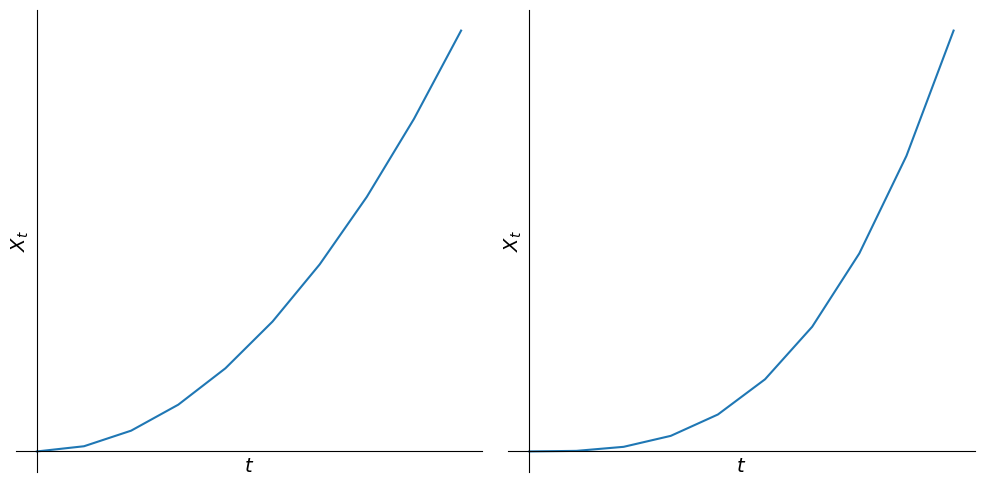

In [ ]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plotting some example data
t = range(10)
X_t1 = [x**2 for x in t]
X_t2 = [x**3 for x in t]

# Plot on the first subplot
ax1.plot(t, X_t1)
ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$X_t$', fontsize=14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position('zero')
ax1.spines['left'].set_position('zero')
ax1.yaxis.set_ticks([])
ax1.xaxis.set_ticks([])

# Plot on the second subplot
ax2.plot(t, X_t2)
ax2.set_xlabel('$t$', fontsize=14)
ax2.set_ylabel('$X_t$', fontsize=14)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_position('zero')
ax2.spines['left'].set_position('zero')
ax2.yaxis.set_ticks([])
ax2.xaxis.set_ticks([])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# patikrinkim kad kodai tikrai veiktų kuriuos į priedą dedu



In [ ]:
def netampri_krastine_salyga_v1(realizacija, d):
    realizacija_dezeje = [] #d := dezes dydis
    for X in realizacija:
        if   X >  d:
            X  =  d
        elif X < -d:
            X  = -d
        realizacija_dezeje.append(X)
    return np.array(realizacija_dezeje)

def tampri_krastine_salyga(realizacija, d=1):

    realizacija_dezeje = np.zeros_like(realizacija)
    position = 0

    for i, position in enumerate(realizacija):
        # Reflect if the position goes outside the boundary nu sita gera yra!
        while abs(position) > box_size:
            if position > d:
                overshoot = position - d
                position = d - overshoot
            elif position < -d:
                overshoot = -d - position
                position = -d + overshoot

        realizacija_dezeje[i] = position

    return realizacija_dezeje


def netampri_krastine_salyga_v2(realizacija, d):
    realizacija_dezeje = []
    X = 0
    realizacija_dezeje.append(X)
    dXX = realizacija[1:]-realizacija[:-1]  #gaunam prieaugius
    for dX in dXX:
        #po viena priaugi pridedam
        X += dX
        #jei lipa X virs dezes -- neleidziame
        if   X > d:
            X =  d
        elif X <-d:
            X = -d
        realizacija_dezeje.append(X)
    return np.array(realizacija_dezeje)


def kimbanti_krastine_salyga(realizacija, d, P_kibimo =0.5):
    realizacija_dezeje = []
    X = 0
    realizacija_dezeje.append(X)
    dXX = realizacija[1:]-realizacija[:-1] #dXX prieaugiai
    for dX in dXX:
        if abs(X) == d: #jei prie sienos prikibes
            #mesk kauliuka ar atlipsi
            if np.random.random()>P_kibimo:
                X += dX
        else: #jei prie sienos neprikibes
            X += dX
        #dezes prasokti negalima
        if   X >  d:
            X = d
        elif X < -d:
            X = -d
        realizacija_dezeje.append(X)
    return np.array(realizacija_dezeje) #grazinam realizacija

krastines_salygos = [netampri_krastine_salyga_v1,
                    netampri_krastine_salyga_v2,
                    tampri_krastine_salyga,
                    kimbanti_krastine_salyga]


In [ ]:
def hurstai(xx):
    try:
        higuchi = 2-higuchi1(xx)
    except:
        print("fuck higuchi")
        higuchi='error'
    try:
        msd = myMSD(xx)
    except:
        print("fuck msd")
        msd = 'error'
    try:
        rs = myRS(xx)
    except:
        print("fuck rs")
        rs = 'error'

    return higuchi, msd, rs

In [ ]:

def plotKrastines(H =0.7):
    f = FBM(n=1000, hurst=H, length=10, method='daviesharte')

    d = 1

    fig, [ax0,ax1, ax2,ax3,ax4] = plt.subplots(1,5, figsize=(15,3), sharey = True, sharex=True)

    axes = [ax0,ax1,ax2,ax3,ax4]



    xx0 = f.fbm()
    ax0.set_title(f'Be kraštinių sąlygų FBM su H={H}')


    xx1 = netampri_krastine_salyga_v1(xx0, d = d)
    ax1.set_title('Netampri kraštinė sąlyga (v1)')


    xx2 = netampri_krastine_salyga_v2(xx0, d = d)
    ax2.set_title('Netampri kraštinė sąlyga (v2)')


    xx3 = tampri_krastine_salyga(xx0, d = d)
    ax3.set_title('Tampri kraštinė sąlyga')

    xx4 = kimbanti_krastine_salyga(xx0, d = d, P_kibimo =0.7)
    ax4.set_title('Kimbanti kraštinė sąlyga P=0.7')


    xxx = [xx0,xx1,xx2,xx3,xx4]

    for ax,xx in zip(axes,xxx):
        ax.axhline(y=box_size, linestyle='--',color='red')
        ax.axhline(y=-box_size, linestyle='--',color='red')
        higuchi, msd, rs = hurstai(xx)
        ax.plot(xx,color='black',\
            label = r'$H_{Higuchi}=$'+f'{higuchi:1.2f}'\
            +'\n'+'$H_{MSD}=$'+f'{msd:1.2f}'\
            +'\n'+'$H_{RS}=$'+f'{rs:1.2f}')

        ax.legend(fontsize=13)

    fig.tight_layout()

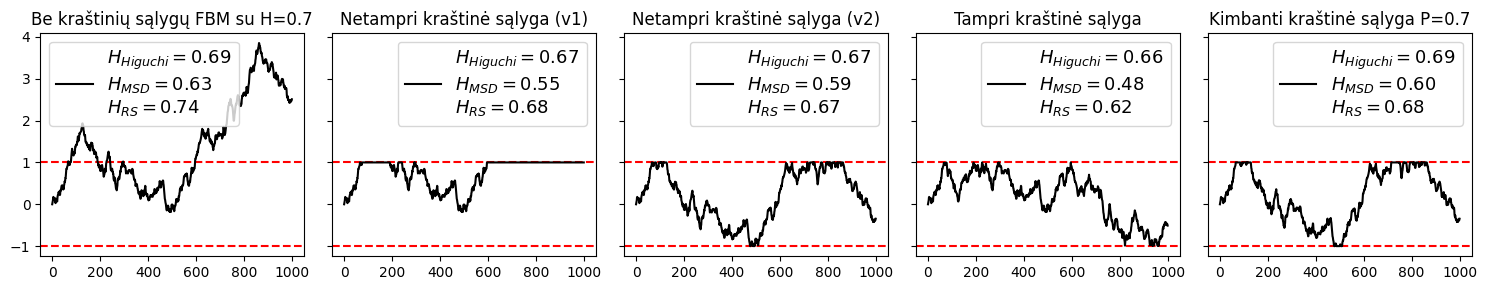

In [ ]:
plotKrastines(H =0.7)

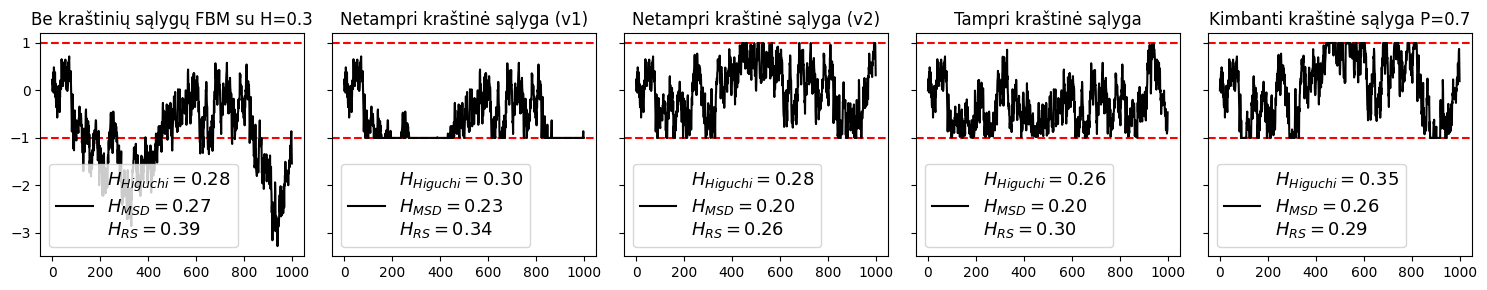

In [ ]:
plotKrastines(H =0.3)

In [ ]:
def plotKrastinesLevy():

    d = 1

    fig, [ax0,ax1, ax2,ax3,ax4] = plt.subplots(1,5, figsize=(15,3), sharey = True, sharex=True)

    axes = [ax0,ax1,ax2,ax3,ax4]



    xx0 = levy_stable.rvs(alpha=4/3, beta=0, size=1000).cumsum()/40
    ax0.set_title(r'Be kraštinių sąlygų Levy su $\alpha=4/3$')


    xx1 = netampri_krastine_salyga_v1(xx0, d = d)
    ax1.set_title('Netampri kraštinė sąlyga (v1)')


    xx2 = netampri_krastine_salyga_v2(xx0, d = d)
    ax2.set_title('Netampri kraštinė sąlyga (v2)')


    xx3 = tampri_krastine_salyga(xx0, d = d)
    ax3.set_title('Tampri kraštinė sąlyga')

    xx4 = kimbanti_krastine_salyga(xx0, d = d, P_kibimo =0.7)
    ax4.set_title('Kimbanti kraštinė sąlyga P=0.7')


    xxx = [xx0,xx1,xx2,xx3,xx4]

    for ax,xx in zip(axes,xxx):
        ax.axhline(y=box_size, linestyle='--',color='red')
        ax.axhline(y=-box_size, linestyle='--',color='red')
        higuchi, msd, rs = hurstai(xx)
        ax.plot(xx,color='black',\
            label = r'$H_{Higuchi}=$'+f'{higuchi:1.2f}'\
            +'\n'+'$H_{MSD}=$'+f'{msd:1.2f}'\
            +'\n'+'$H_{RS}=$'+f'{rs:1.2f}')

        ax.legend(fontsize=13)


    fig.tight_layout()

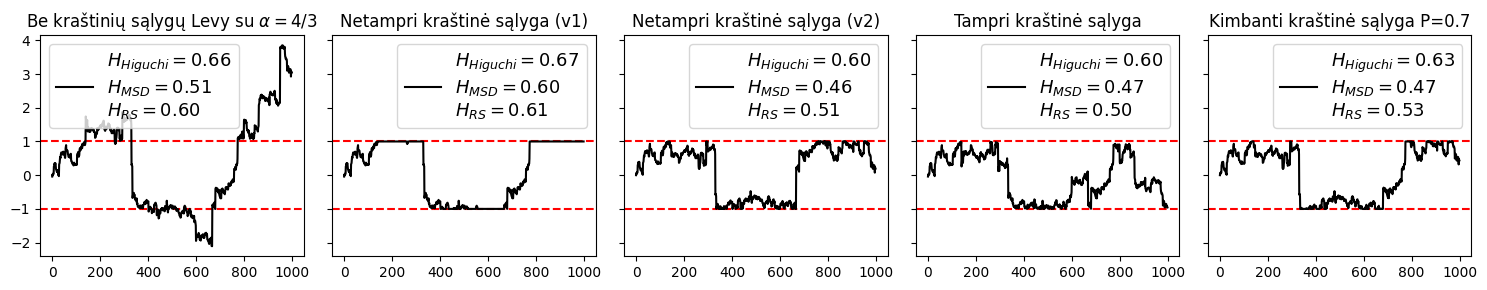

In [ ]:

plotKrastinesLevy()

In [ ]:
#

# wavelety


In [ ]:
# Example usage (commented out for now)

alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1];
print("Lag-1 autocorrelation = {:4.2f}".format(alpha))
result = waipy.cwt(data_norm, 1, 1, 0.25, 2, 4/0.25, alpha, 6, mother='Morlet', name='penis')
waipy.wavelet_plot(f'dėžėje {box_size}', time, data_norm, 0.03125, result);

#noise_data = np.random.normal(0, 0.1, 1000)  # Generating some random noise
#result = #mirror_reflection_bounded_fbm(noise_data)
result = noise_data
# print(result)
data_norm = waipy.normalize(result)
label='sdf'
time = np.arange(0, 1000)

alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1];
print("Lag-1 autocorrelation = {:4.2f}".format(alpha))
result = waipy.cwt(data_norm, 1, 1, 0.25, 2, 4/0.25, alpha, 6, mother='Morlet', name='penis')
waipy.wavelet_plot('laisvas', time, data_norm, 0.03125, result);

In [253]:
1/1.25

0.8

In [254]:
4/3

1.3333333333333333

In [255]:
3/4

0.75